# Notebook to run basic `scanpy` QC and doublet detection with `scrublet` for SRA Project - PRJNA769125
- **Developed by**: Srivalli Kolla

- **Created date** : 14 October, 2024

- **Modification date** : 23 October, 2024

- **Würzburg Institute for Systems Immunology & Julius-Maximilian-Universität Würzburg**

Env : Scanpy(Python 3.12.4)

# Import sample_names

In [178]:
import anndata
import logging
import anndata as ad
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sb
import scrublet as scr
import os
import time
import matplotlib.pyplot as plt
from statsmodels.robust.scale import mad as median_abs_deviation
from matplotlib import colors
from matplotlib import rcParams

In [179]:
sc.settings.verbosity = 3
sc.logging.print_versions()
sc.settings.set_figure_params(dpi = 160, color_map = 'RdPu', dpi_save = 180, vector_friendly = True, format = 'svg')
timestamp = time.strftime("%d_%m_%Y")

-----
anndata     0.10.8
scanpy      1.10.2
-----
PIL                 10.3.0
annoy               NA
array_api_compat    1.7.1
asttokens           NA
attr                23.2.0
attrs               23.2.0
cattr               NA
cattrs              NA
certifi             2024.08.30
cffi                1.16.0
charset_normalizer  3.3.2
colorama            0.4.6
comm                0.2.2
cycler              0.12.1
cython_runtime      NA
dateutil            2.9.0.post0
debugpy             1.8.2
decorator           5.1.1
defusedxml          0.7.1
distutils           3.12.4
django              5.0.6
executing           2.0.1
future              1.0.0
h5py                3.11.0
idna                3.7
igraph              0.11.5
ipykernel           6.29.5
ipython_genutils    0.2.0
ipywidgets          8.1.3
jedi                0.19.1
joblib              1.4.2
kiwisolver          1.4.5
lazy_loader         0.4
legacy_api_wrap     NA
leidenalg           0.10.2
llvmlite            0.43.0
louvain      

# Import sample_names

In [180]:
path = '../ncbi_sra/data'
files = ['SRR16220102.h5ad',
'SRR16220103.h5ad',
'SRR16220104.h5ad',
'SRR16220105.h5ad',
'SRR16220106.h5ad',
'SRR16220107.h5ad',
'SRR16220108.h5ad',
'SRR16220109.h5ad',
'SRR16220110.h5ad',
'SRR16220111.h5ad',
'SRR16220112.h5ad',
'SRR16220113.h5ad',
'SRR16220114.h5ad',]

In [181]:
adata_combined = None
vars_combined = []

for file in files:
    file_path = os.path.join(path, file)
    
    try:

        adata = sc.read_h5ad(file_path)

        sample_name = os.path.basename(file_path).split('.')[0]
        adata.obs['sample_name'] = sample_name


        sc.pp.filter_cells(adata, min_counts=10)
        sc.pp.filter_genes(adata, min_counts=10)


        adata.var_names = adata.var_names.str.split('.').str[0]
        adata.var_names = [f"{name}_{sample_name}" for name in adata.var_names]

        vars_combined.extend(adata.var_names)


        if adata_combined is None:
            adata_combined = adata
        else:
            adata_combined = sc.concat([adata_combined, adata], join='outer', index_unique='-')

        print(f"Successfully read and concatenated: {file}")

    except Exception as e:
        print(f"Error reading {file}: {e}")

unique_var_names = pd.Series(vars_combined).unique()
adata_combined.var_names = unique_var_names[:adata_combined.n_vars] 
adata_combined

filtered out 6794804 cells that have less than 10 counts
filtered out 63079 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220102.h5ad
filtered out 6794796 cells that have less than 10 counts
filtered out 63082 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220103.h5ad
Error reading SRR16220104.h5ad: [Errno 2] Unable to synchronously open file (unable to open file: name = '../ncbi_sra/data/SRR16220104.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
Error reading SRR16220105.h5ad: [Errno 2] Unable to synchronously open file (unable to open file: name = '../ncbi_sra/data/SRR16220105.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
filtered out 6794640 cells that have less than 10 counts
filtered out 63062 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220106.h5ad
Error reading SRR16220107.h5ad: [Errno 2] Unable to synchronously open file (unable to open file: name = '../ncbi_sra/data/SRR16220107.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
filtered out 6794445 cells that have less than 10 counts
filtered out 62890 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220108.h5ad
filtered out 6794467 cells that have less than 10 counts
filtered out 62887 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220109.h5ad
filtered out 6794378 cells that have less than 10 counts
filtered out 62846 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220110.h5ad
Error reading SRR16220111.h5ad: [Errno 2] Unable to synchronously open file (unable to open file: name = '../ncbi_sra/data/SRR16220111.h5ad', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)
filtered out 6794575 cells that have less than 10 counts
filtered out 62953 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220112.h5ad
filtered out 6794856 cells that have less than 10 counts
filtered out 63085 genes that are detected in less than 10 counts


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


Successfully read and concatenated: SRR16220113.h5ad
filtered out 6794858 cells that have less than 10 counts
filtered out 63086 genes that are detected in less than 10 counts
Successfully read and concatenated: SRR16220114.h5ad


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 2101 × 804
    obs: 'sample_name', 'n_counts'

In [182]:
adata_combined

AnnData object with n_obs × n_vars = 2101 × 804
    obs: 'sample_name', 'n_counts'

In [183]:
adata_combined.obs

,sample_name,n_counts
"('AAAGTGAAGAGATTCA',)-0-0-0-0-0-0-0-0",SRR16220102,44
"('AACAAAGCATCGCTAA',)-0-0-0-0-0-0-0-0",SRR16220102,37
"('AACCACATCCAAGGAA',)-0-0-0-0-0-0-0-0",SRR16220102,39
"('AAGCGTTCATAGCTAC',)-0-0-0-0-0-0-0-0",SRR16220102,241
"('AAGGAATCAAATCAGA',)-0-0-0-0-0-0-0-0",SRR16220102,32
...,...,...
"('TCACAAGGTCAGGAGT',)-1",SRR16220114,13
"('TCATGAGGTCAGGAGT',)-1",SRR16220114,13
"('TCATGCCAGTAATCCC',)-1",SRR16220114,12
"('TGGATCACAAGGTCAG',)-1",SRR16220114,16


In [184]:
adata_combined.var

""
DAB1_SRR16220102
PPEF2_SRR16220102
CNTNAP2_SRR16220102
PTPRN2_SRR16220102
LINGO2_SRR16220102
...
MRTFA_SRR16220112
DMD_SRR16220112
FTX_SRR16220112
UTY_SRR16220112


In [185]:
adata_combined.obs['sample_name'].value_counts()

sample_name
SRR16220110    502
SRR16220108    435
SRR16220109    413
SRR16220112    305
SRR16220106    240
SRR16220103     84
SRR16220102     76
SRR16220113     24
SRR16220114     22
Name: count, dtype: int64

## Doublet score prediction

In [186]:
scrub = scr.Scrublet(adata_combined.X)

doublet_scores, predicted_doublets = scrub.scrub_doublets(n_prin_comps= 5)
            
adata_combined.obs['doublet_scores'] = doublet_scores
adata_combined.obs['predicted_doublets'] = predicted_doublets

/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scrublet/helper_functions.py:321: RuntimeWarning: divide by zero encountered in divide
  w.setdiag(float(target_total) / tots_use)


Preprocessing...
Simulating doublets...
Embedding transcriptomes using PCA...
Calculating doublet scores...
Automatically set threshold at doublet score = 0.03
Detected doublet rate = 0.0%
Estimated detectable doublet fraction = 0.0%
Overall doublet rate:
	Expected   = 10.0%
	Estimated  = 0.0%
Elapsed time: 0.2 seconds


In [187]:
adata_combined.obs

,sample_name,n_counts,doublet_scores,predicted_doublets
"('AAAGTGAAGAGATTCA',)-0-0-0-0-0-0-0-0",SRR16220102,44,0.000793,False
"('AACAAAGCATCGCTAA',)-0-0-0-0-0-0-0-0",SRR16220102,37,0.000793,False
"('AACCACATCCAAGGAA',)-0-0-0-0-0-0-0-0",SRR16220102,39,0.000793,False
"('AAGCGTTCATAGCTAC',)-0-0-0-0-0-0-0-0",SRR16220102,241,0.021322,False
"('AAGGAATCAAATCAGA',)-0-0-0-0-0-0-0-0",SRR16220102,32,0.000793,False
...,...,...,...,...
"('TCACAAGGTCAGGAGT',)-1",SRR16220114,13,0.000793,False
"('TCATGAGGTCAGGAGT',)-1",SRR16220114,13,0.000793,False
"('TCATGCCAGTAATCCC',)-1",SRR16220114,12,0.000793,False
"('TGGATCACAAGGTCAG',)-1",SRR16220114,16,0.000793,False


### Checking the count and percentage of Doublets - sample_name level

In [188]:
doub_tab = pd.crosstab(adata_combined.obs['sample_name'],adata_combined.obs['predicted_doublets'])
doub_tab.sum()

predicted_doublets
False    2101
dtype: int64

In [189]:
true_doublets = adata_combined.obs['predicted_doublets'] == True
true_doublets_count = true_doublets.sum()

true_doublets_percentage = (true_doublets_count / len(adata_combined.obs)) * 100

true_doublets_count ,true_doublets_percentage

(0, 0.0)

### Saving raw data

In [190]:
sample_name_object = adata_combined.copy()
sample_name_object

AnnData object with n_obs × n_vars = 2101 × 804
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets'

## Compute QC stats

In [191]:
sample_name_object.shape

(2101, 804)

### Labelling Mt and Ribo genes

In [192]:
sample_name_object.var

""
DAB1_SRR16220102
PPEF2_SRR16220102
CNTNAP2_SRR16220102
PTPRN2_SRR16220102
LINGO2_SRR16220102
...
MRTFA_SRR16220112
DMD_SRR16220112
FTX_SRR16220112
UTY_SRR16220112


In [193]:
sample_name_object.var.index = sample_name_object.var.index.str.split('_').str[0]
sample_name_object.var

""
DAB1
PPEF2
CNTNAP2
PTPRN2
LINGO2
...
MRTFA
DMD
FTX
UTY


### Ensembl annotations

In [194]:
annot = sc.queries.biomart_annotations(
        "hsapiens",
        ["ensembl_gene_id", "external_gene_name", "start_position", "end_position", "chromosome_name"],
    ).set_index("ensembl_gene_id")

In [195]:
annot.head()

,external_gene_name,start_position,end_position,chromosome_name
ensembl_gene_id,,,,
ENSG00000210049,MT-TF,577,647,MT
ENSG00000211459,MT-RNR1,648,1601,MT
ENSG00000210077,MT-TV,1602,1670,MT
ENSG00000210082,MT-RNR2,1671,3229,MT
ENSG00000209082,MT-TL1,3230,3304,MT


In [196]:
sample_name_object.var['genes'] = sample_name_object.var.index

sample_name_object.var

,genes
DAB1,DAB1
PPEF2,PPEF2
CNTNAP2,CNTNAP2
PTPRN2,PTPRN2
LINGO2,LINGO2
...,...
MRTFA,MRTFA
DMD,DMD
FTX,FTX
UTY,UTY


In [197]:
sample_name_object.var['gene_name'] = sample_name_object.var.index.map(annot['external_gene_name'])
#sample_name_object.var.set_index('gene_name', inplace=True)
sample_name_object.var

,genes,gene_name
DAB1,DAB1,NaN
PPEF2,PPEF2,NaN
CNTNAP2,CNTNAP2,NaN
PTPRN2,PTPRN2,NaN
LINGO2,LINGO2,NaN
...,...,...
MRTFA,MRTFA,NaN
DMD,DMD,NaN
FTX,FTX,NaN
UTY,UTY,NaN


In [198]:
sample_name_object.var['mt'] = sample_name_object.var_names.str.startswith('MT-') 
sample_name_object.var['ribo'] = sample_name_object.var_names.str.startswith(("RPS","RPL"))
sample_name_object.var

,genes,gene_name,mt,ribo
DAB1,DAB1,NaN,False,False
PPEF2,PPEF2,NaN,False,False
CNTNAP2,CNTNAP2,NaN,False,False
PTPRN2,PTPRN2,NaN,False,False
LINGO2,LINGO2,NaN,False,False
...,...,...,...,...
MRTFA,MRTFA,NaN,False,False
DMD,DMD,NaN,False,False
FTX,FTX,NaN,False,False
UTY,UTY,NaN,False,False


In [199]:
ribo_counts = sample_name_object.var['ribo'].value_counts()

mt_counts = sample_name_object.var['mt'].value_counts()

print("Counts of Ribosomal (ribo) Genes:")
print("False:", ribo_counts.get(False, 0))
print("True:", ribo_counts.get(True, 0))
print("\nCounts of Mitochondrial (mt) Genes:")
print("False:", mt_counts.get(False, 0))
print("True:", mt_counts.get(True, 0))

Counts of Ribosomal (ribo) Genes:
False: 802
True: 2

Counts of Mitochondrial (mt) Genes:
False: 804
True: 0


In [200]:
sample_name_object.var['mt'] = sample_name_object.var['mt'].fillna(False)
sample_name_object.var['ribo'] = sample_name_object.var['ribo'].fillna(False)

### Calculating QC metrics per cell

In [201]:
sc.pp.calculate_qc_metrics(sample_name_object,qc_vars = ['mt','ribo'],inplace = True)

In [202]:
sample_name_object

AnnData object with n_obs × n_vars = 2101 × 804
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo'
    var: 'genes', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'

## Sex covariate analysis

### Chr Y genes calculation

In [203]:
sample_name_object.var['gene_name'] = sample_name_object.var['genes'].map(annot['external_gene_name']).fillna('')
sample_name_object.var['chromosome'] = sample_name_object.var['genes'].map(annot['chromosome_name'])

In [204]:
sample_name_object.var

,genes,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
DAB1,DAB1,,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
PPEF2,PPEF2,,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
CNTNAP2,CNTNAP2,,False,False,9,0.004760,0.004748,99.571633,10.0,2.397895,NaN
PTPRN2,PTPRN2,,False,False,8,0.004760,0.004748,99.619229,10.0,2.397895,NaN
LINGO2,LINGO2,,False,False,7,0.004760,0.004748,99.666825,10.0,2.397895,NaN
...,...,...,...,...,...,...,...,...,...,...,...
MRTFA,MRTFA,,False,False,10,0.005236,0.005222,99.524036,11.0,2.484907,NaN
DMD,DMD,,False,False,18,0.009995,0.009946,99.143265,21.0,3.091042,NaN
FTX,FTX,,False,False,15,0.008091,0.008059,99.286054,17.0,2.890372,NaN
UTY,UTY,,False,False,14,0.007139,0.007114,99.333651,15.0,2.772589,NaN


In [205]:
chrY_genes = sample_name_object.var['chromosome'] == "Y"
chrY_genes

DAB1               False
PPEF2              False
CNTNAP2            False
PTPRN2             False
LINGO2             False
                   ...  
MRTFA              False
DMD                False
FTX                False
UTY                False
ENSG00000289136    False
Name: chromosome, Length: 804, dtype: bool

In [206]:
sample_name_object.obs['percent_chrY'] = np.sum(
    sample_name_object[:, chrY_genes].X, axis = 1) / np.sum(sample_name_object.X, axis = 1) * 100

/tmp/ipykernel_488578/3978536326.py:1: RuntimeWarning: invalid value encountered in divide
  sample_name_object.obs['percent_chrY'] = np.sum(


In [207]:
sample_name_object

AnnData object with n_obs × n_vars = 2101 × 804
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'genes', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

### XIST counts

In [208]:
sample_name_object.var_names

Index(['DAB1', 'PPEF2', 'CNTNAP2', 'PTPRN2', 'LINGO2', 'ENSG00000286016',
       'MAPK1', 'NKAIN2', 'PTPRN2', 'SHANK2',
       ...
       'BRD4', 'MIR99AHG', 'APP', 'TTC28', 'MYH9', 'MRTFA', 'DMD', 'FTX',
       'UTY', 'ENSG00000289136'],
      dtype='object', length=804)

In [209]:
valid_var_names = sample_name_object.var_names[~sample_name_object.var_names.isna()]

xist_genes = valid_var_names[valid_var_names.str.match('XIST')]

xist_genes

Index([], dtype='object')

## Calculate cell cycle scores

### Downloading the list of cell cycle genes

In [210]:
!if [ ! -f ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt ]; then curl -o ../ncbi_sra/data/regev_lab_cell_cycle_genes.txt https://raw.githubusercontent.com/theislab/scanpy_usage/master/180209_cell_cycle/data/regev_lab_cell_cycle_genes.txt; fi

### Marking cell cycle genes

#### Steps followed

1. Loading genes and captilizing 
2. Printing the length of cell cycle genes list
3. Split genes into 2 lists (#First 43 genes,#Gene 43 to end)
4. Filtering cell cycle genes only if present in processed_gene_names
5. Print the list of cell cycle genes observed in our data

In [211]:
cell_cycle_genes = [x.strip() for x in open('../ncbi_sra/data/regev_lab_cell_cycle_genes.txt')]
#cell_cycle_genes = [gene.capitalize() for gene in cell_cycle_genes]
print(len(cell_cycle_genes))

s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]

cell_cycle_genes = [x for x in cell_cycle_genes if x in sample_name_object.var_names]
print(len(cell_cycle_genes))

97
0


In [212]:
cell_cycle_genes

[]

### Creating basic anndata and normalization for cell cycle score calculation

In [213]:
adata_combined_log = anndata.AnnData(X = sample_name_object.X,  var = sample_name_object.var, obs = sample_name_object.obs)
sc.pp.normalize_total(adata_combined_log, target_sum = 1e6, exclude_highly_expressed = True)
sc.pp.log1p(adata_combined_log)

normalizing counts per cell. The following highly-expressed genes are not considered during normalization factor computation:
['DAB1', 'PPEF2', 'CNTNAP2', 'PTPRN2', 'LINGO2', 'ENSG00000286016', 'MAPK1', 'NKAIN2', 'PTPRN2', 'SHANK2', 'ENSG00000286016', 'NRXN1-DT', 'DPP10', 'FHIT', 'UNC5C', 'PDE4D', 'TENM2', 'IMMP2L', 'CNTNAP2', 'CSMD1', 'NRG1', 'CCDC26', 'PTPRD', 'TALAM1', 'CNTN5', 'OPCML', 'SOX5', 'CIT', 'NRXN3', 'RBFOX1', 'LINC01572', 'MACROD2', 'MIR99AHG', 'DMD', 'IL1RAPL2', 'CAMTA1', 'KAZN', 'CSMD2', 'DAB1', 'GNG12-AS1', 'NEGR1', 'ADGRL2', 'ENSG00000233290', 'DPYD', 'NPR1', 'ENSG00000231424', 'CACNA1E', 'USH2A', 'GALNT2', 'PCNX2', 'RYR2', 'CHRM3', 'SMYD3', 'MIR3681HG', 'KLHL29', 'ASB3', 'ACYP2', 'WDPCP', 'CTNNA2', 'GLI2', 'ENSG00000286481', 'NCKAP5', 'THSD7B', 'LRP1B', 'PKP4', 'ENSG00000236283', 'CALCRL-AS1', 'PARD3B', 'ENSG00000287042', 'ZNF385D', 'RARB', 'CACNA2D3', 'CFAP20DC-DT', 'FHIT', 'PTPRG', 'PRICKLE2', 'MAGI1', 'EPHA6', 'ENSG00000243276', 'CLSTN2', 'NAALADL2', 'ENSG00000223

/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


### Cell cycle score calculation

In [214]:
adata_combined_log.var_names = adata_combined_log.var_names.astype(str)
adata_combined_log.var_names_make_unique()

## Data visualization

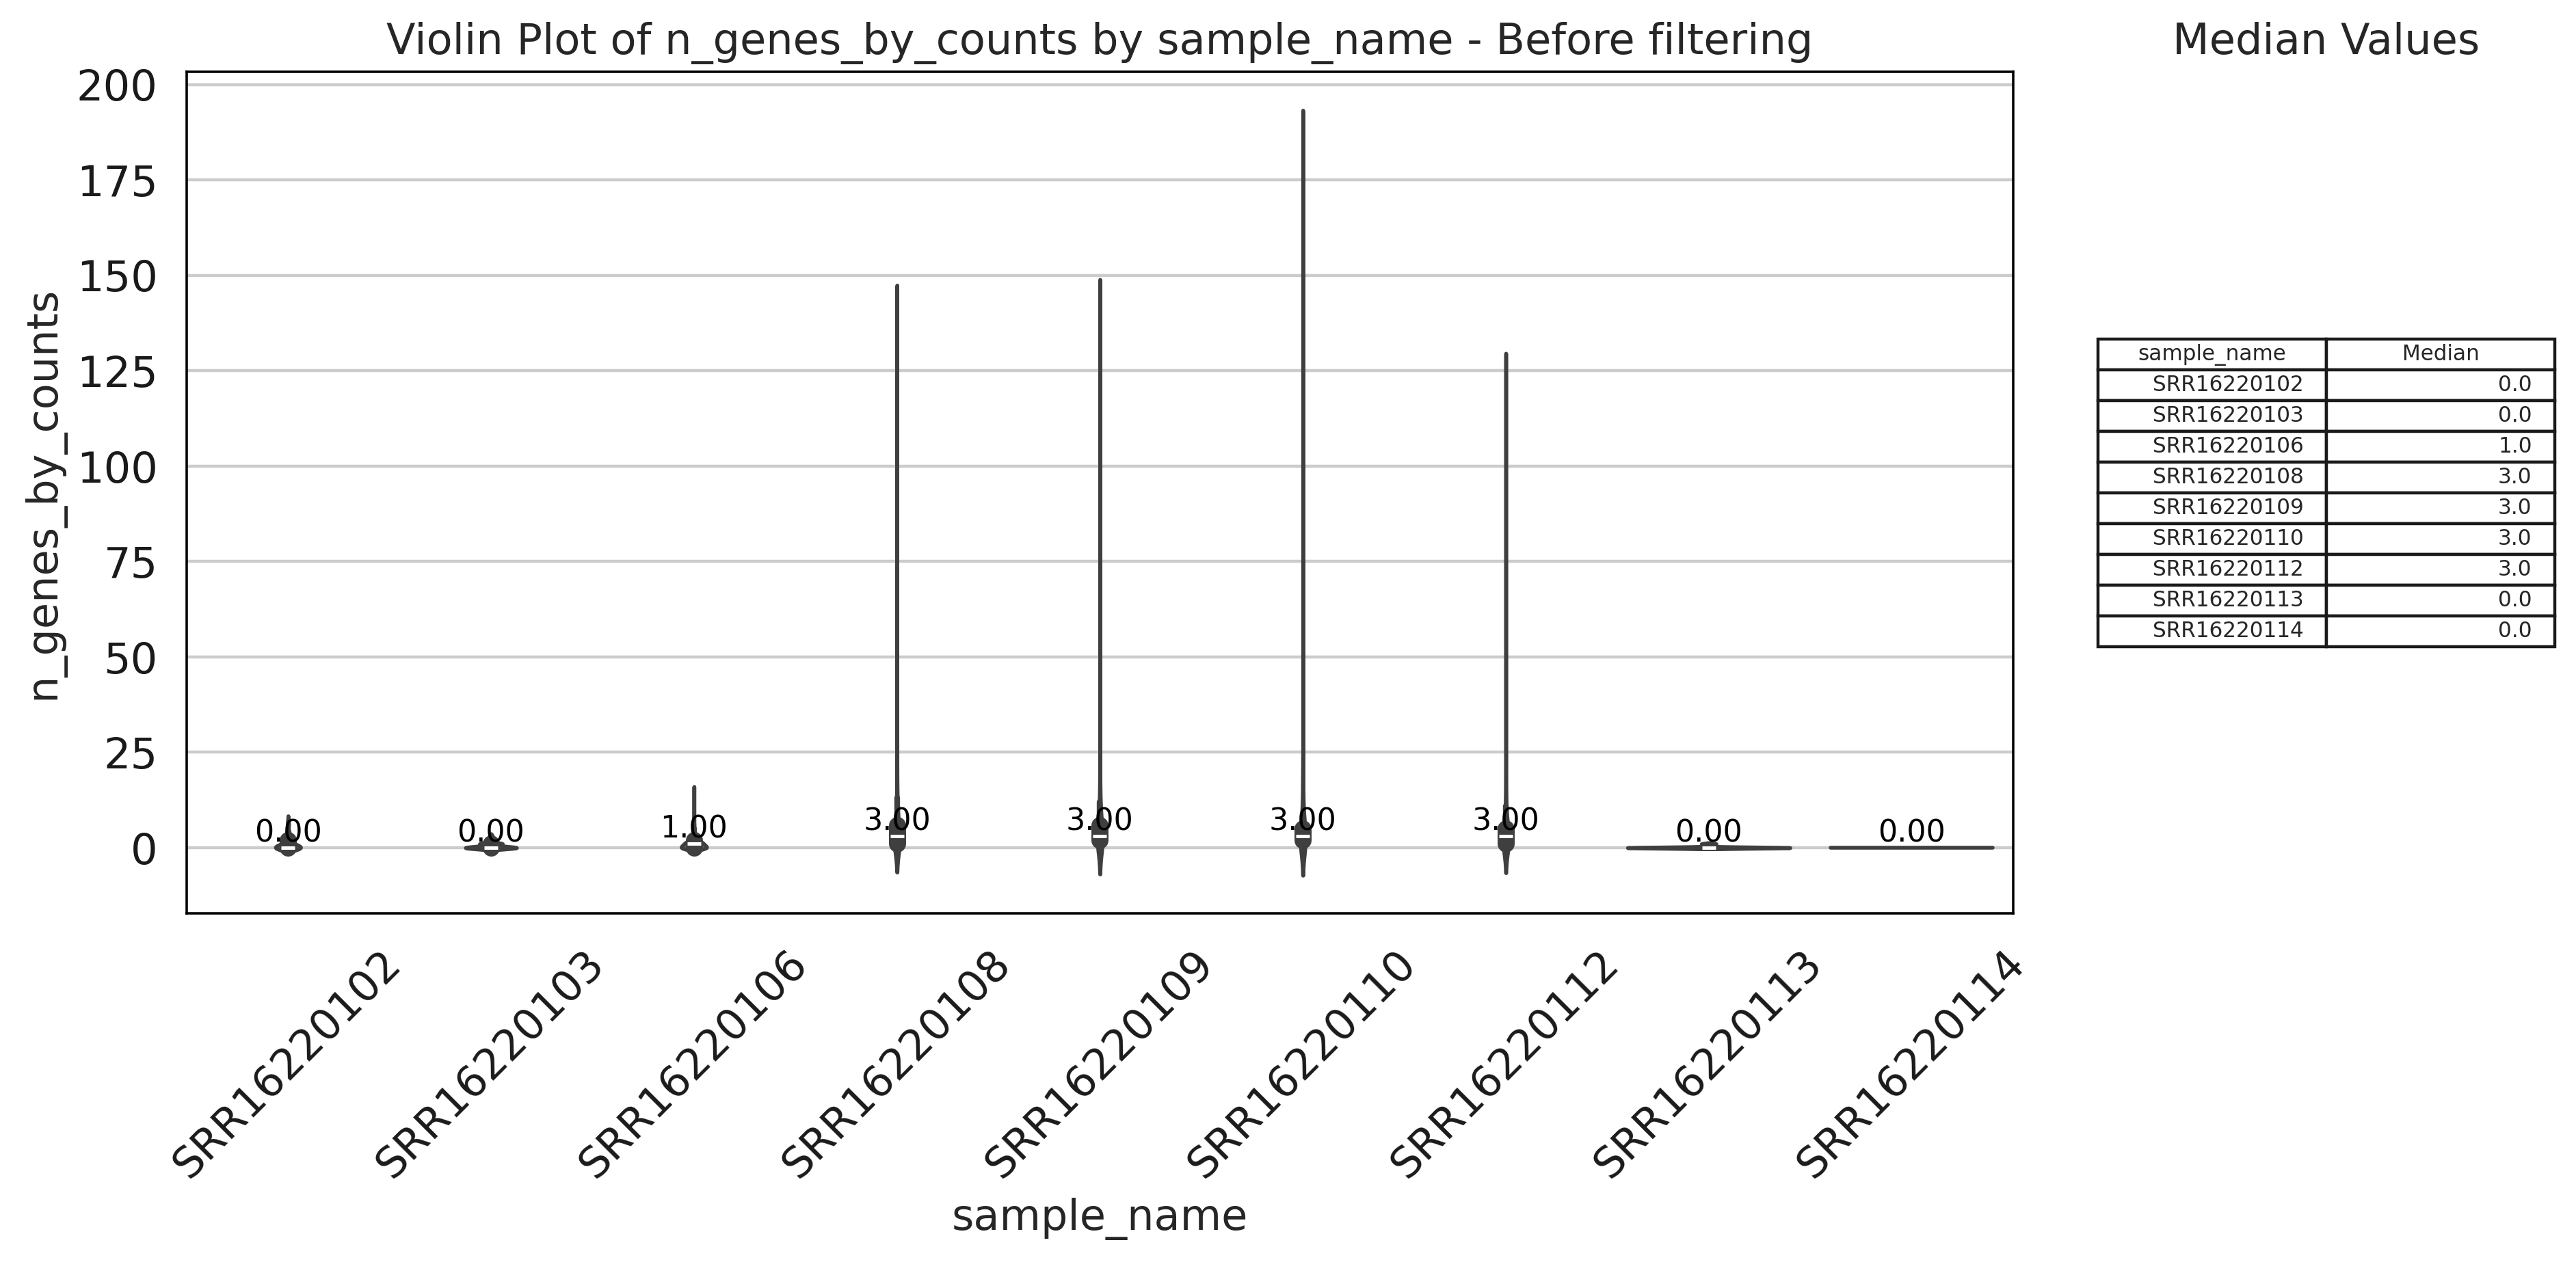

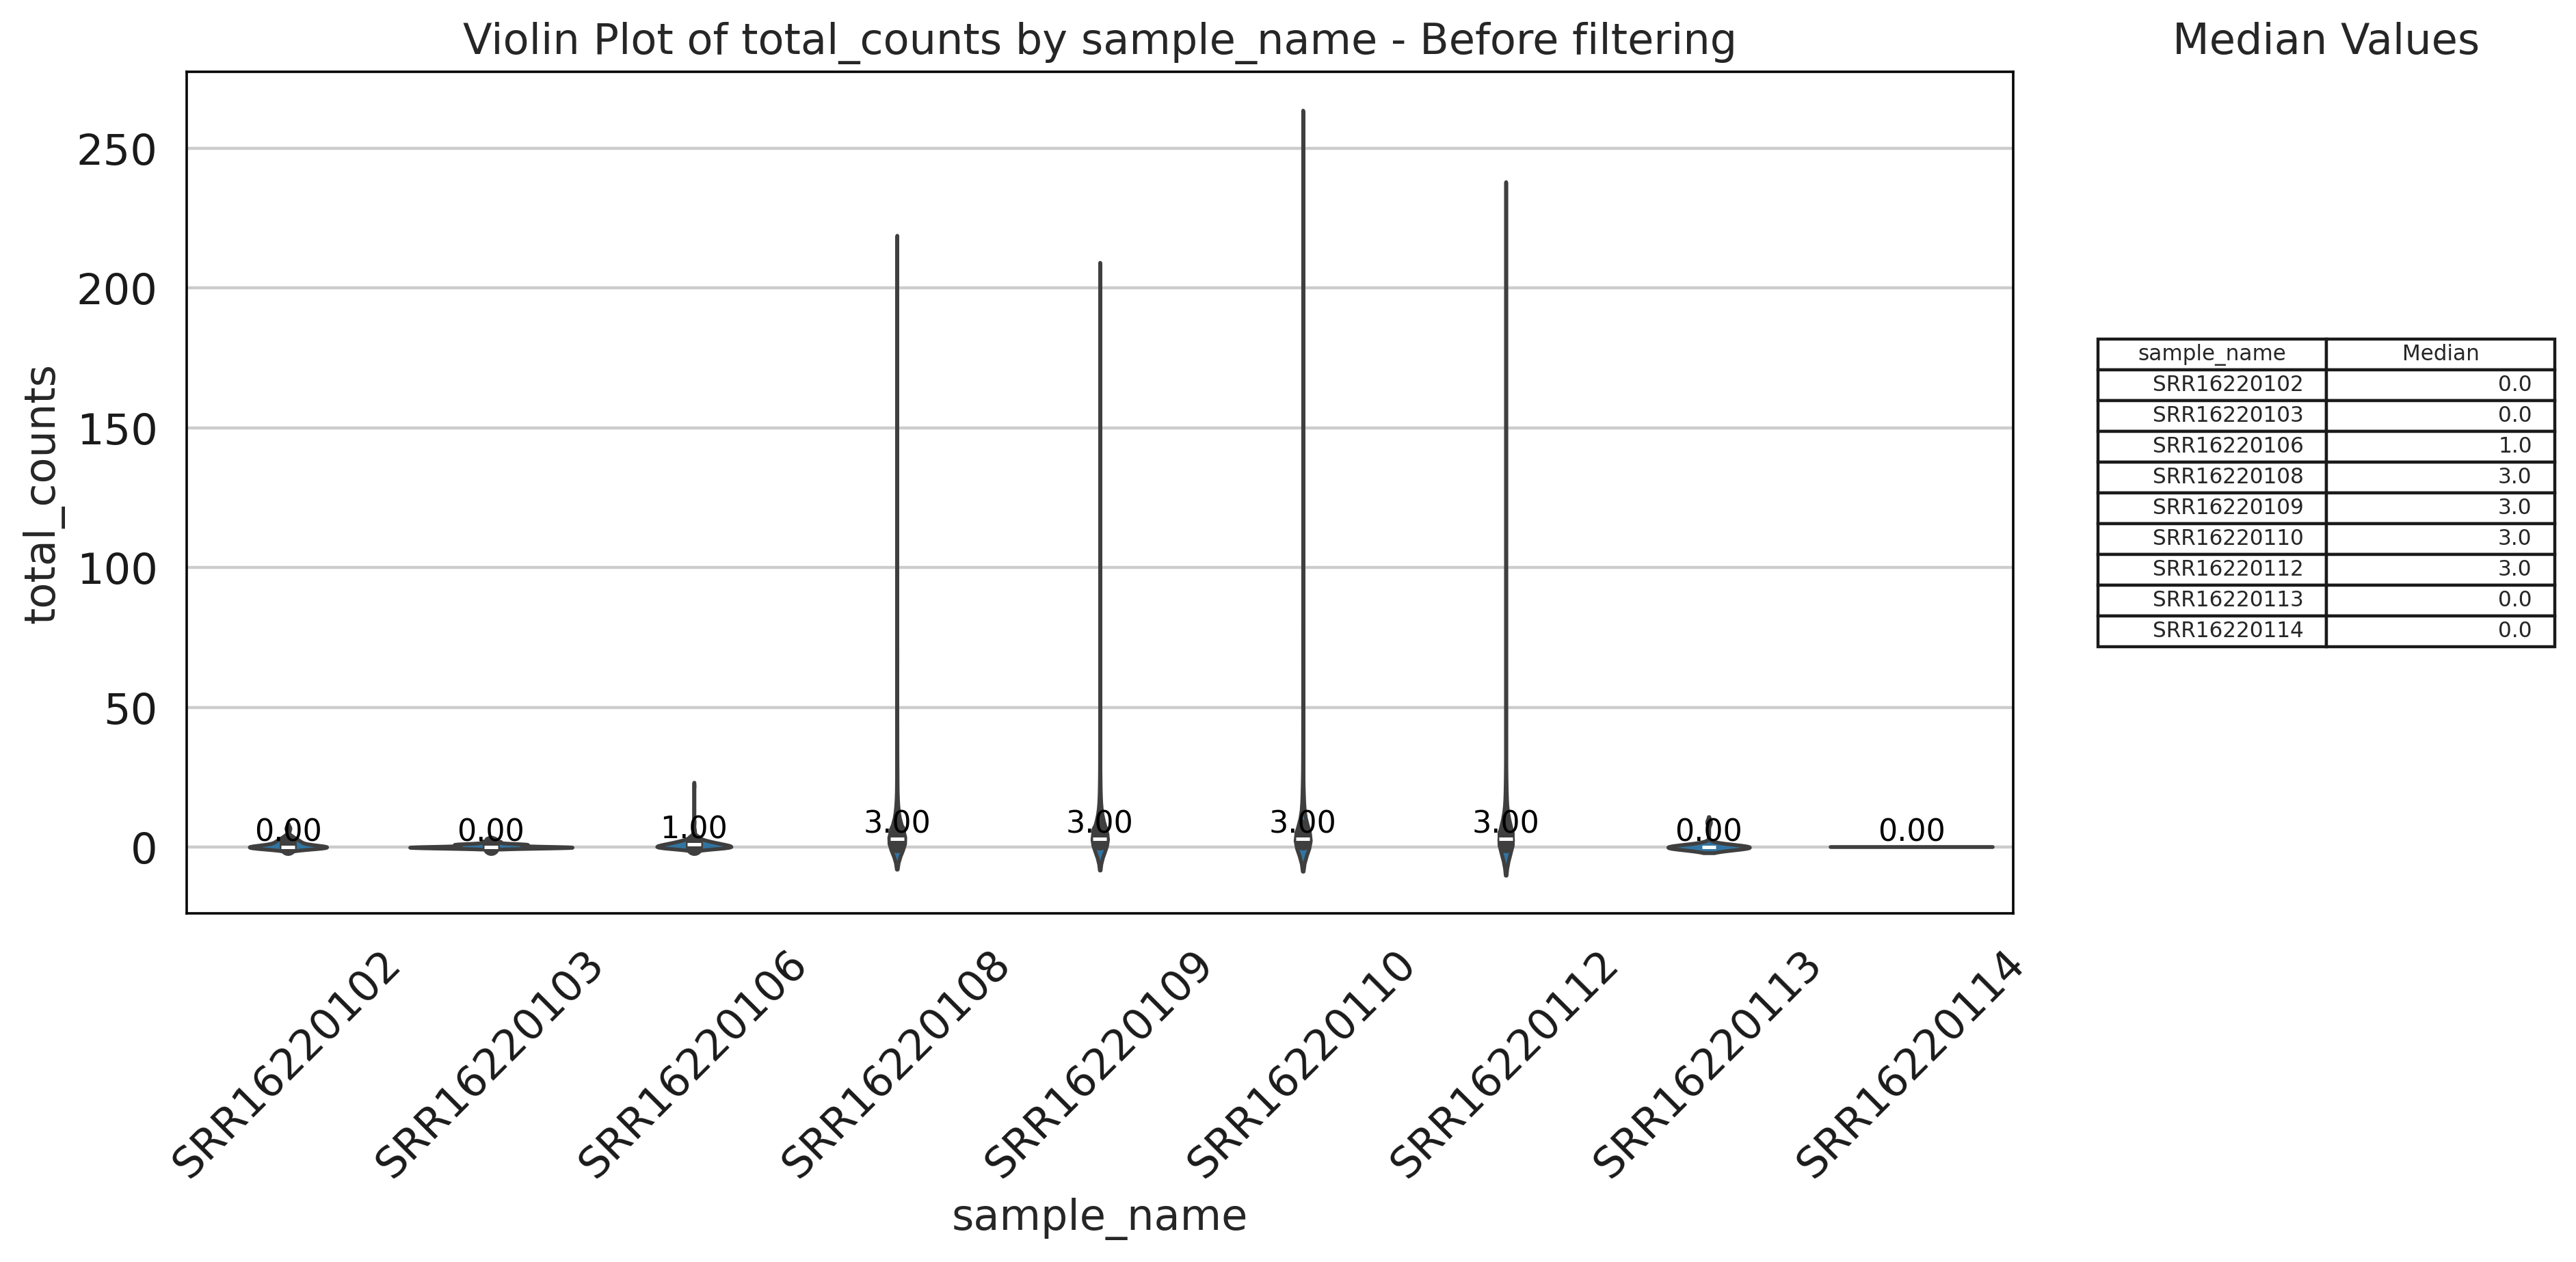

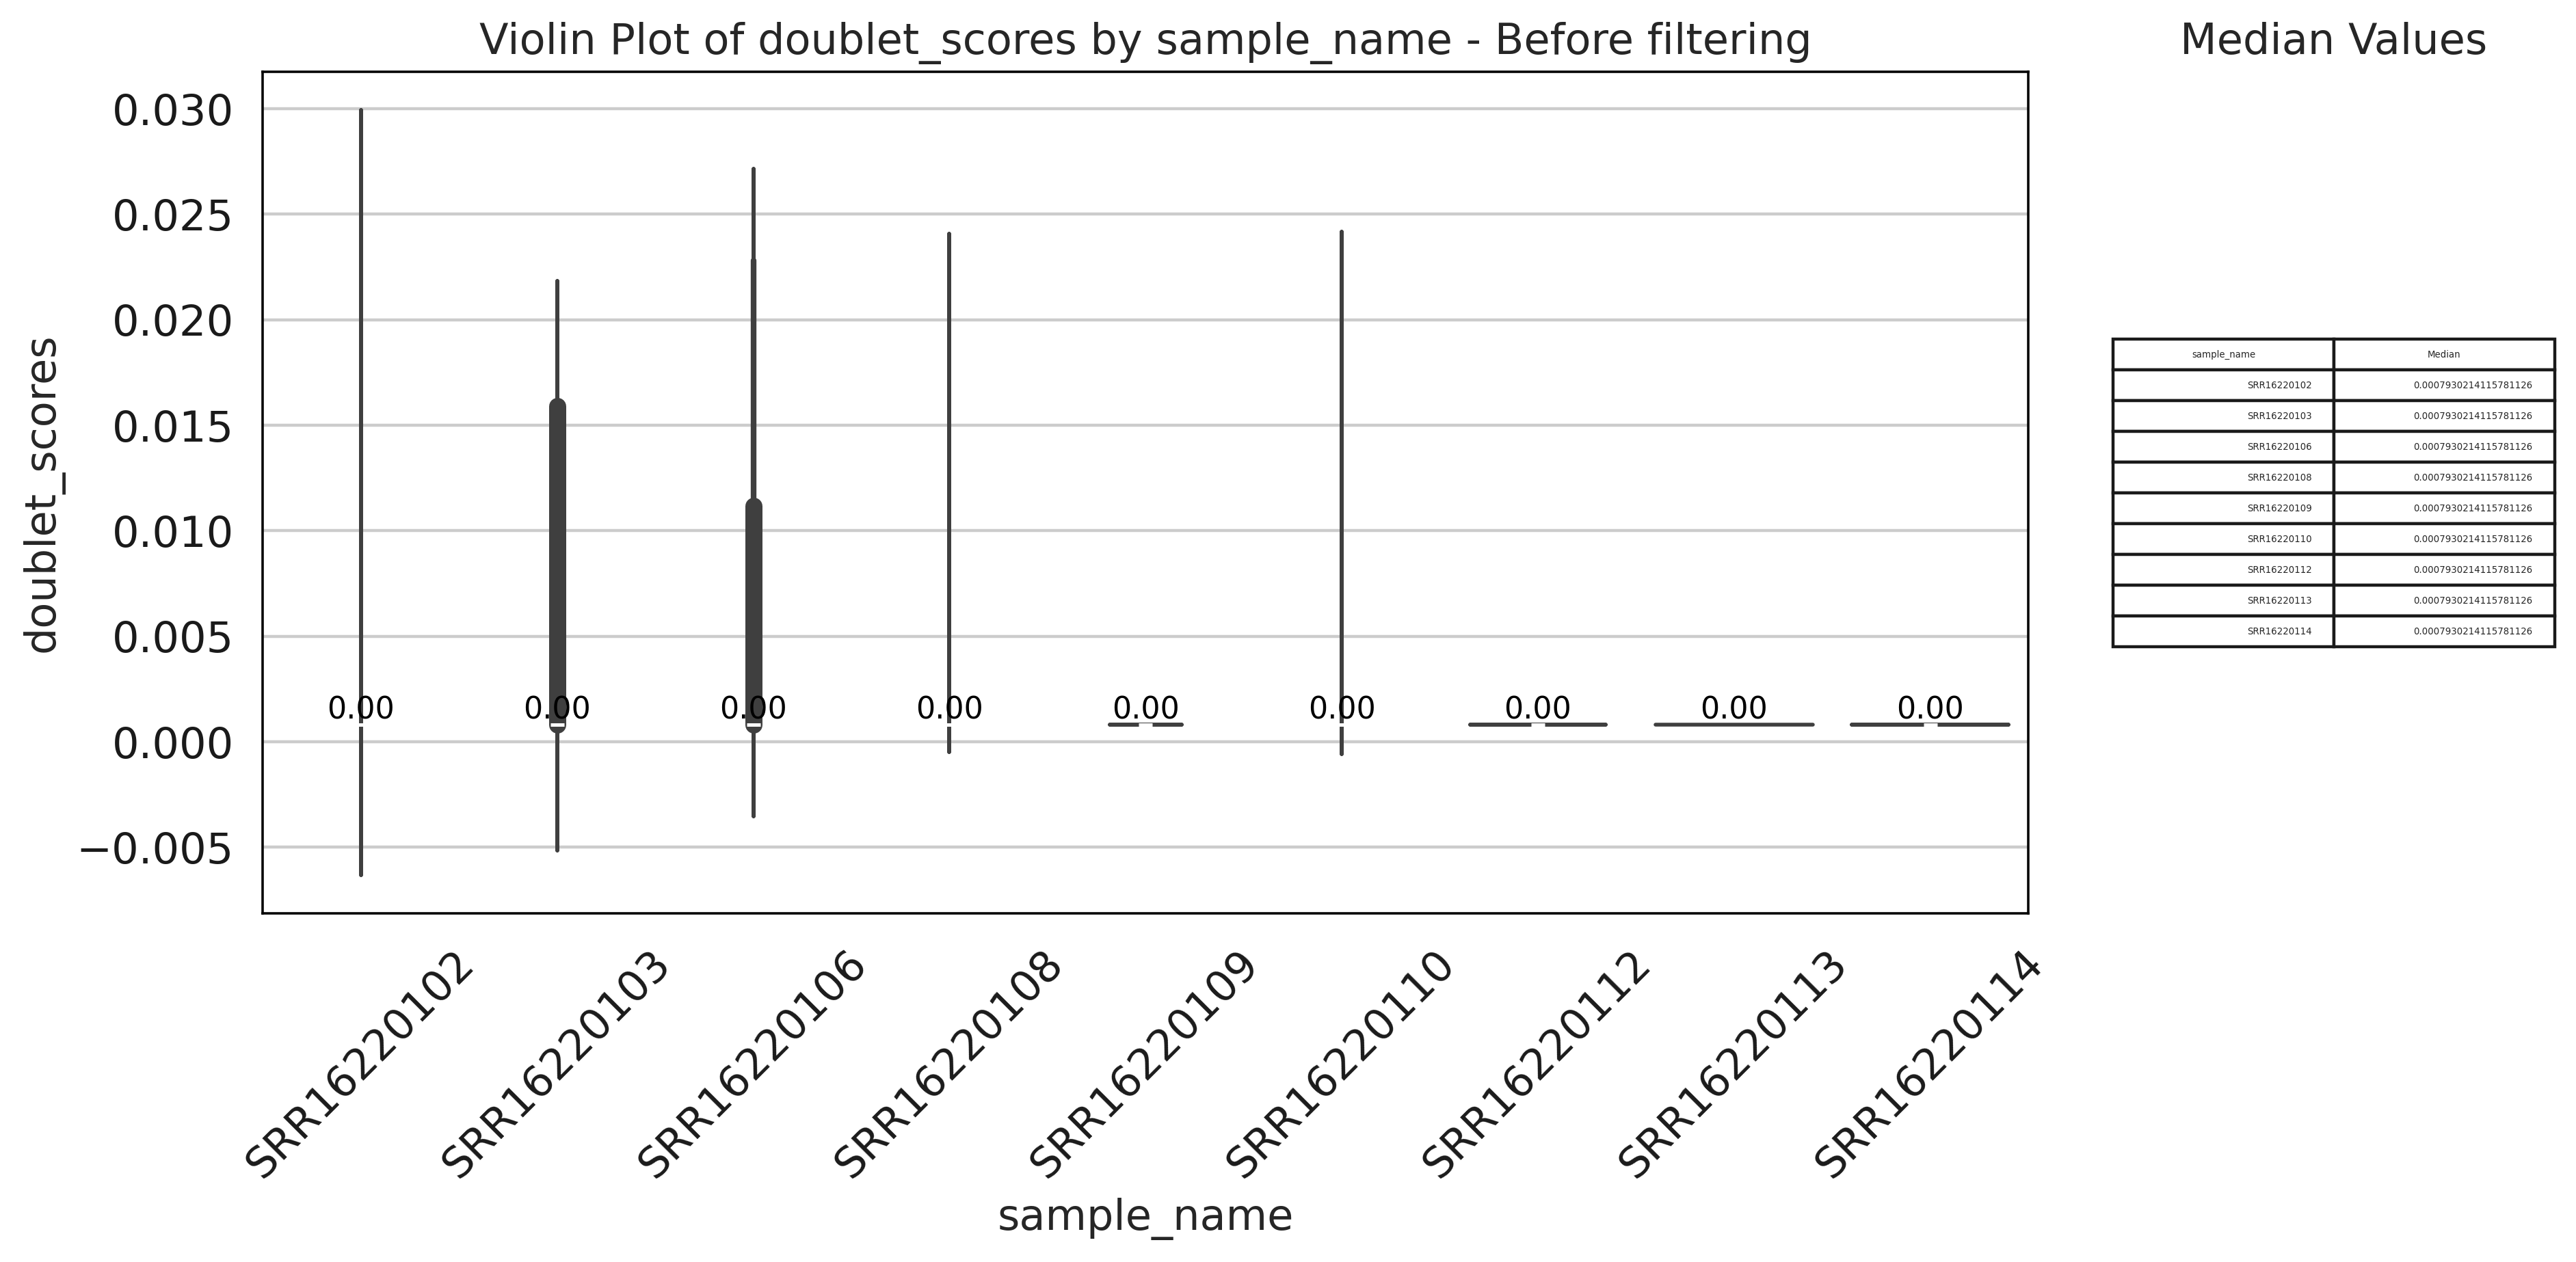

In [215]:
variables = 'n_genes_by_counts', 'total_counts', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=sample_name_object.obs,x = 'sample_name' , y=var, ax=ax[0])
   
    medians = sample_name_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - Before filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()


### Visualization of qc metrics

Text(0.5, 1.0, 'Mt and Ribo percentages - Before filtering')

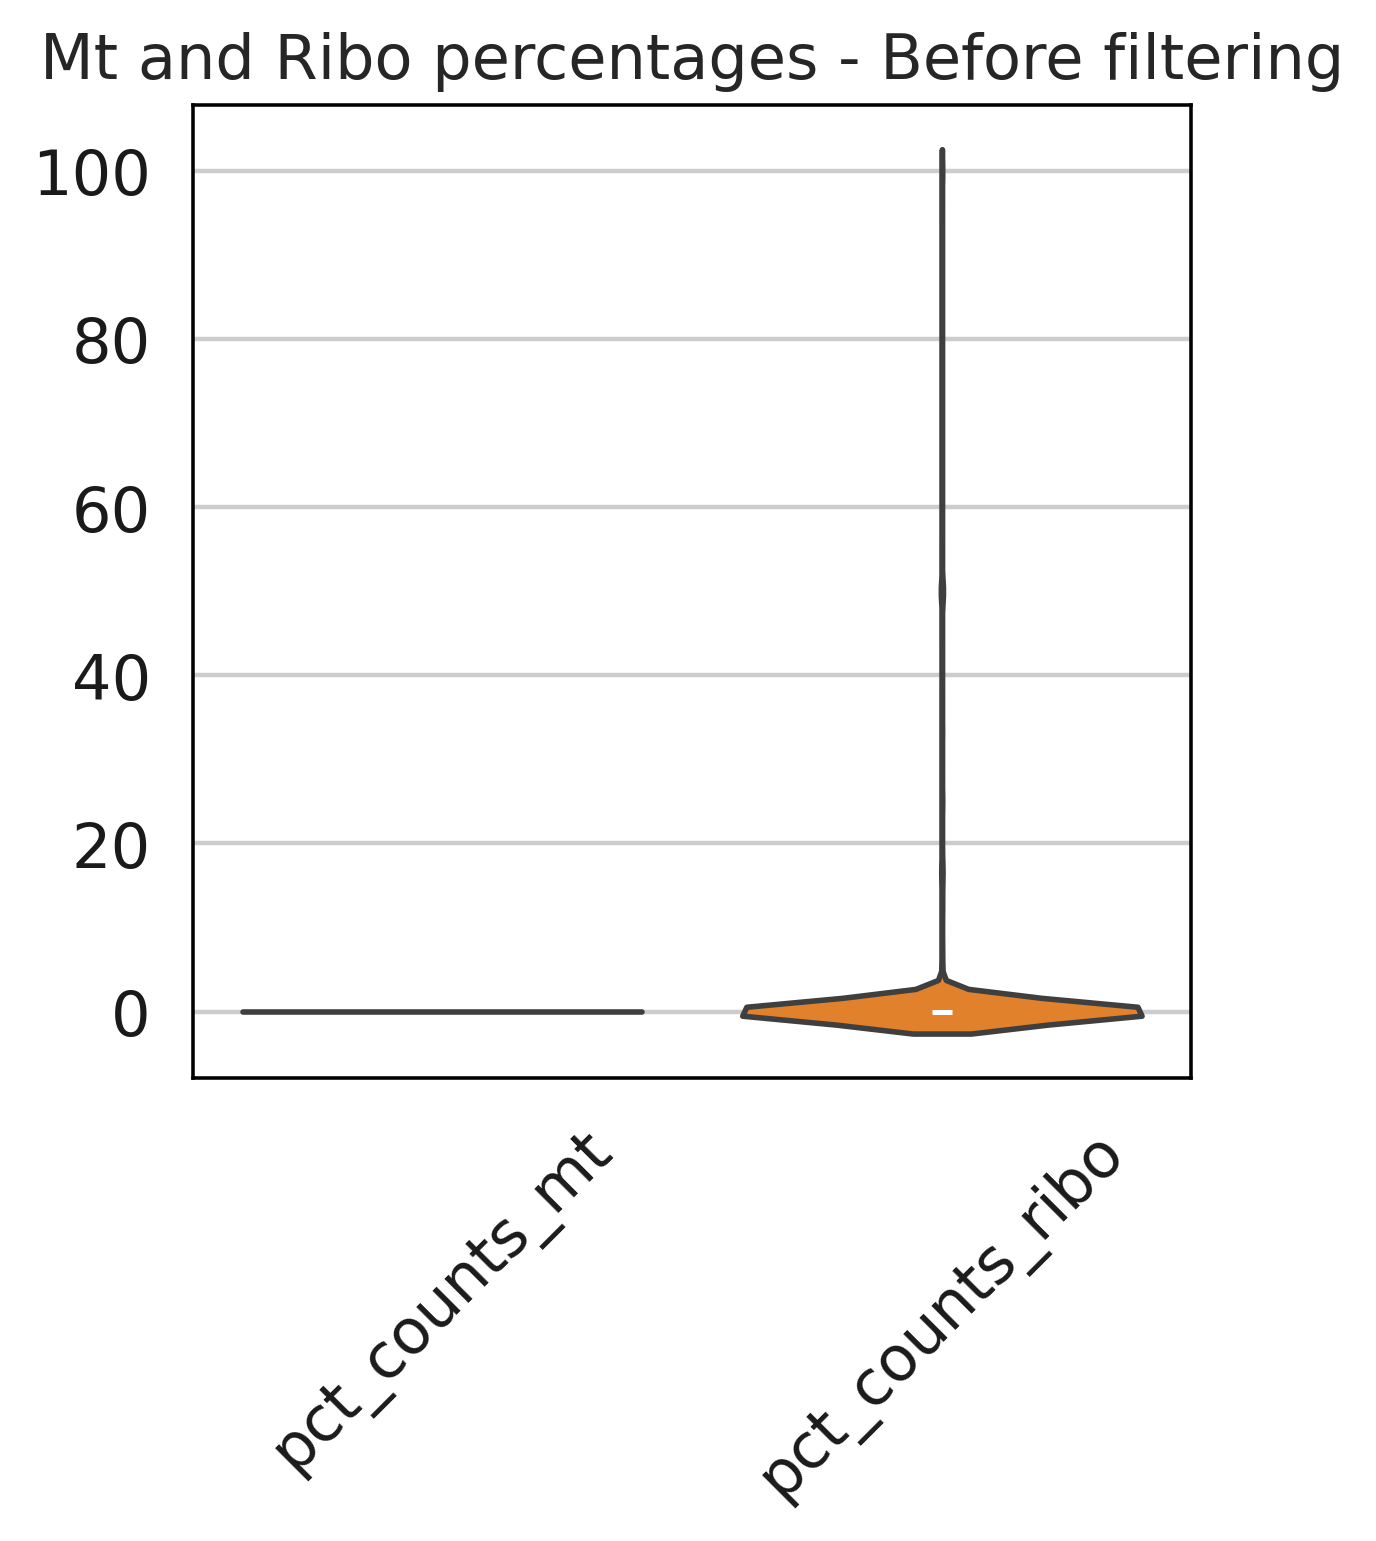

In [216]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=sample_name_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - Before filtering')

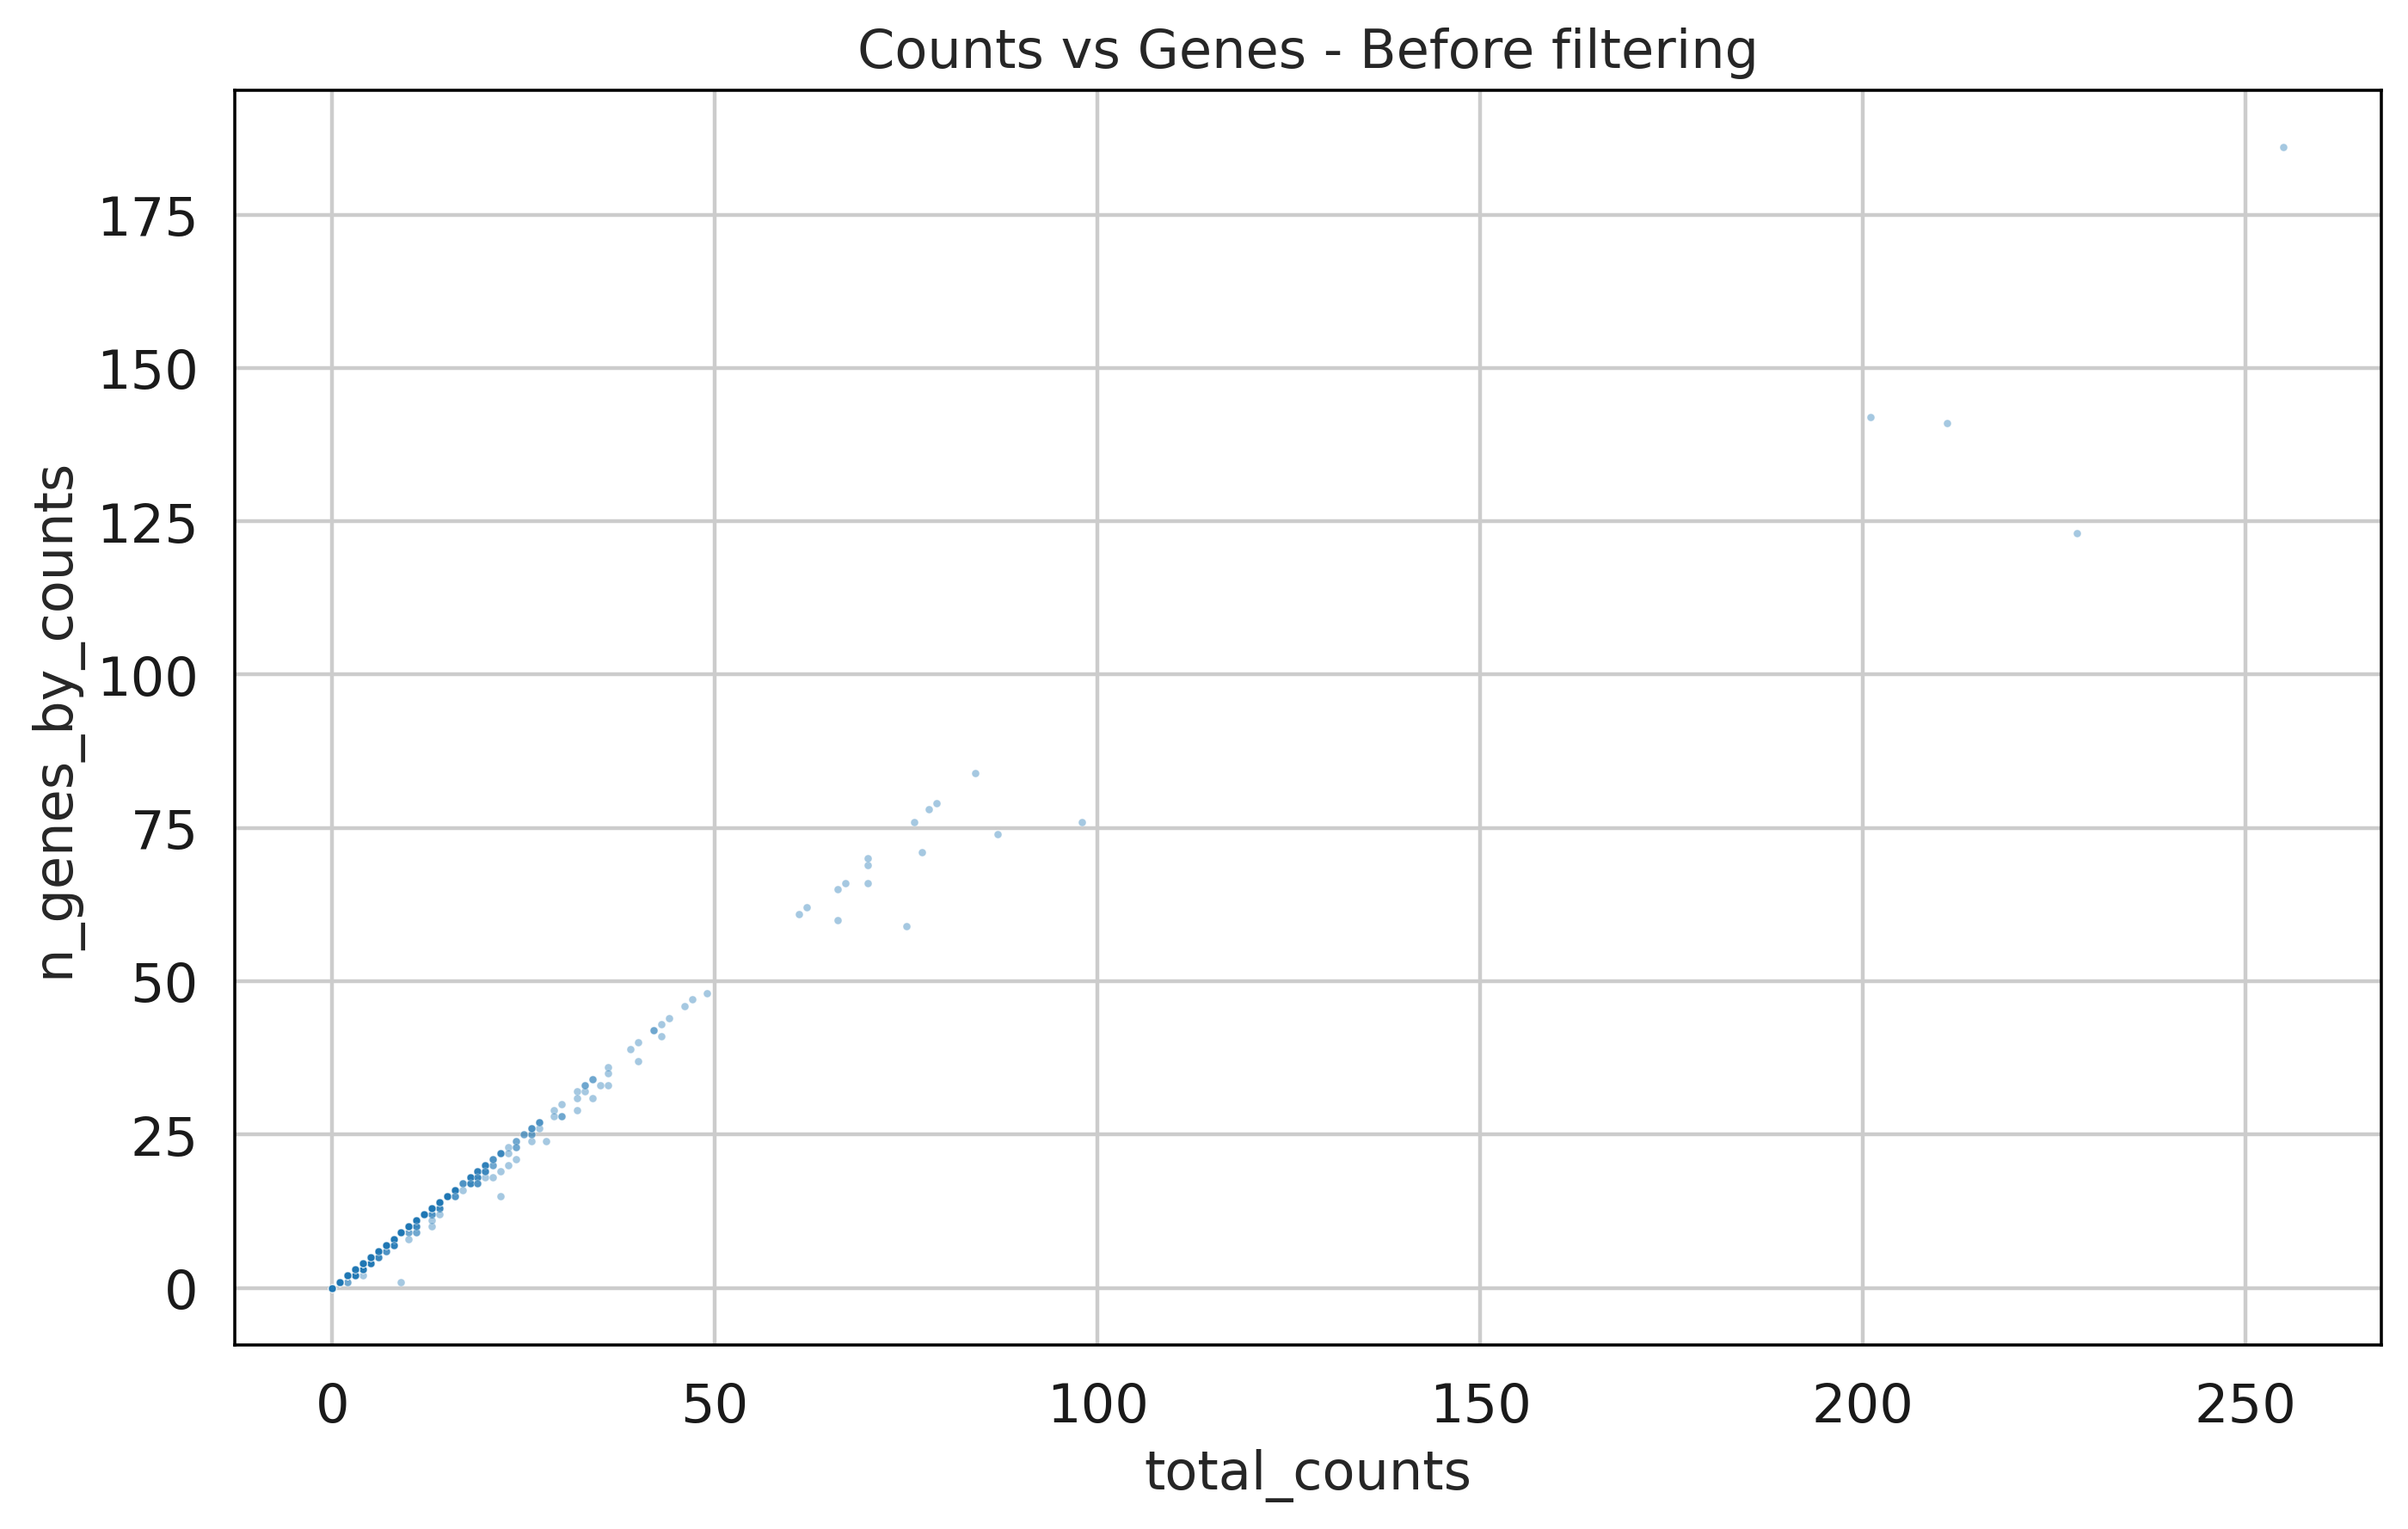

In [217]:
plt.figure(figsize=(10, 6))
sb.scatterplot(data=sample_name_object.obs, x='total_counts', y='n_genes_by_counts' , alpha = 0.4, s=4)
#plt.xticks(range(0, int(max(sample_name_object.obs['total_counts'])) + 1, 3000),rotation=45, fontsize = 10)
#plt.yticks(range(0, int(max(sample_name_object.obs['n_genes_by_counts'])) + 1, 1000),fontsize = 10)
plt.title(f'Counts vs Genes - Before filtering')
plt.show()

### Filtering based on QC metrics

In [218]:
filtered_object = sample_name_object[sample_name_object.obs['n_genes_by_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['n_genes_by_counts'] < 100]

filtered_object = filtered_object[filtered_object.obs['total_counts'] > 10]
filtered_object = filtered_object[filtered_object.obs['total_counts'] < 100]

filtered_object = filtered_object[filtered_object.obs['pct_counts_mt'] < 60]
filtered_object = filtered_object[filtered_object.obs['pct_counts_ribo'] < 20]

filtered_object = filtered_object[filtered_object.obs['doublet_scores'] < 0.35]

filtered_object

View of AnnData object with n_obs × n_vars = 208 × 804
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'genes', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'

Text(0.5, 1.0, 'Mt and Ribo percentages - After filtering')

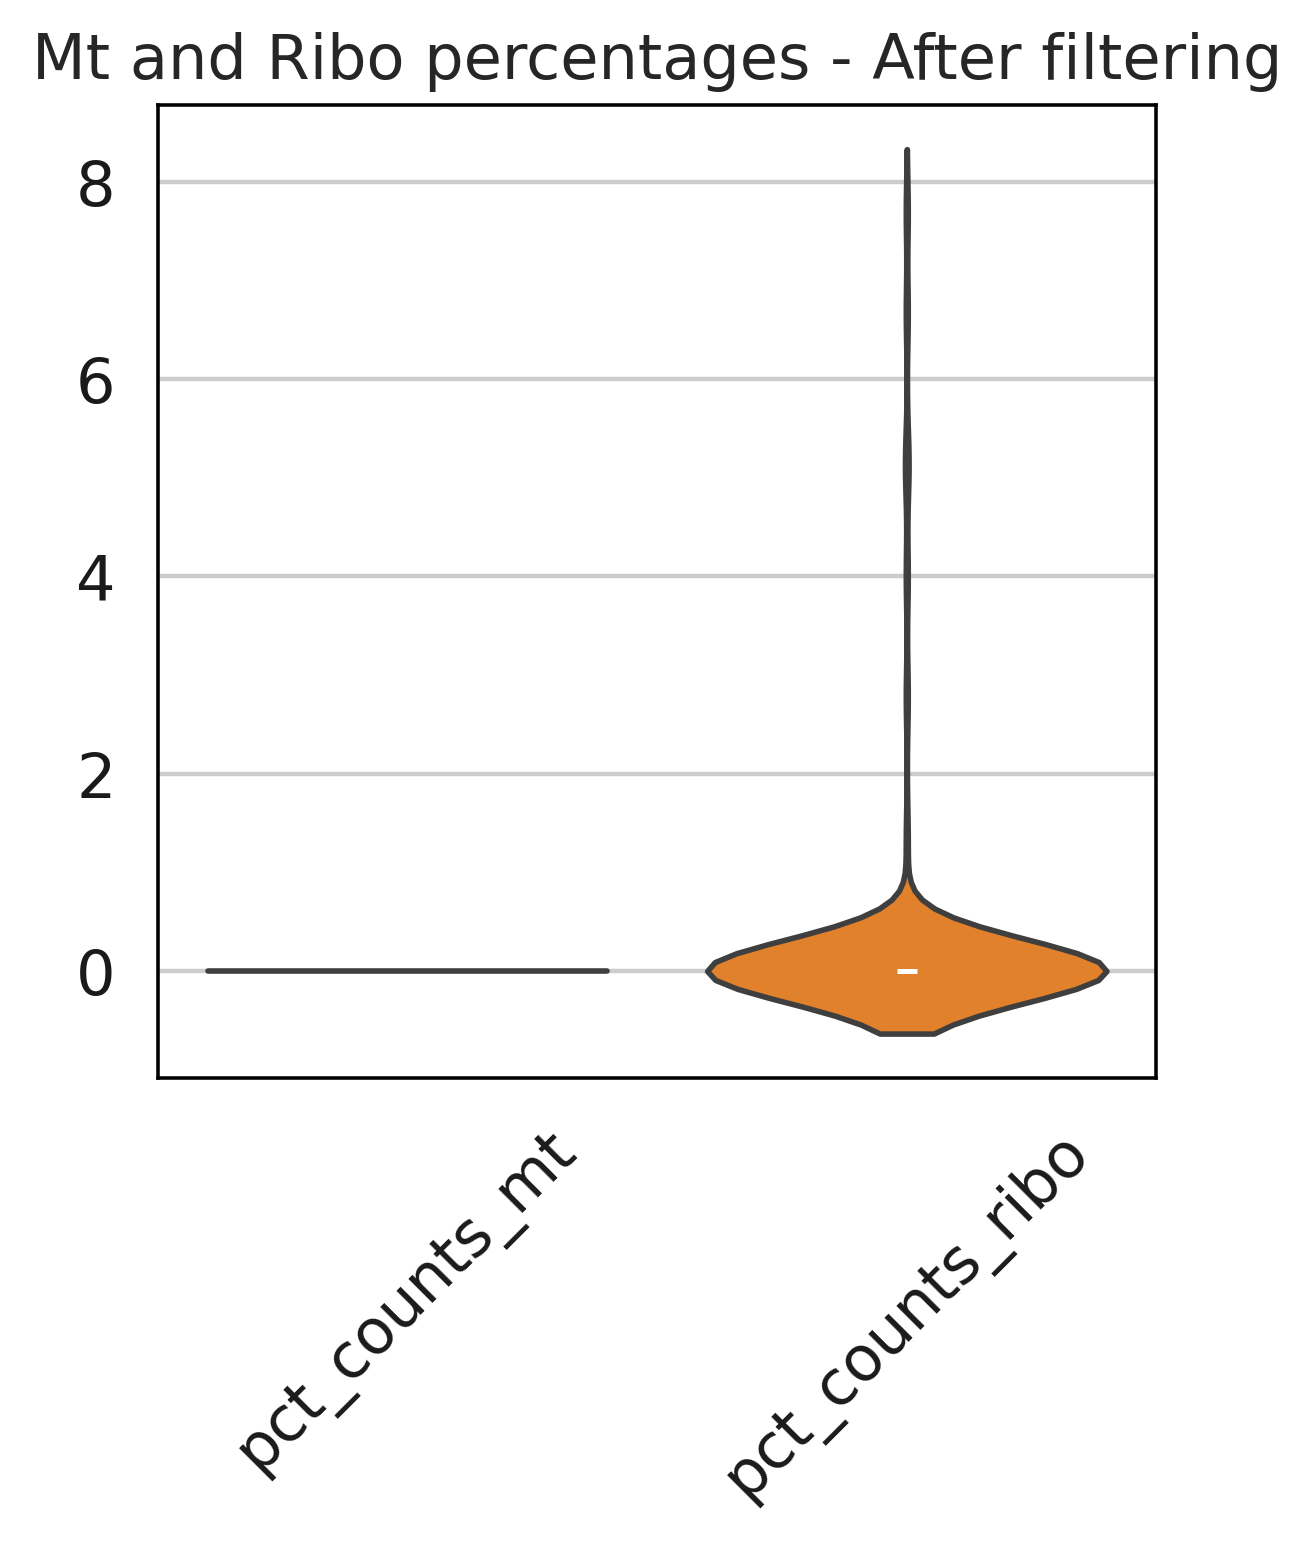

In [219]:
variables = ['pct_counts_mt', 'pct_counts_ribo']

sb.violinplot(data=filtered_object.obs[variables])
plt.xticks(rotation=45)
plt.title(f'Mt and Ribo percentages - After filtering')

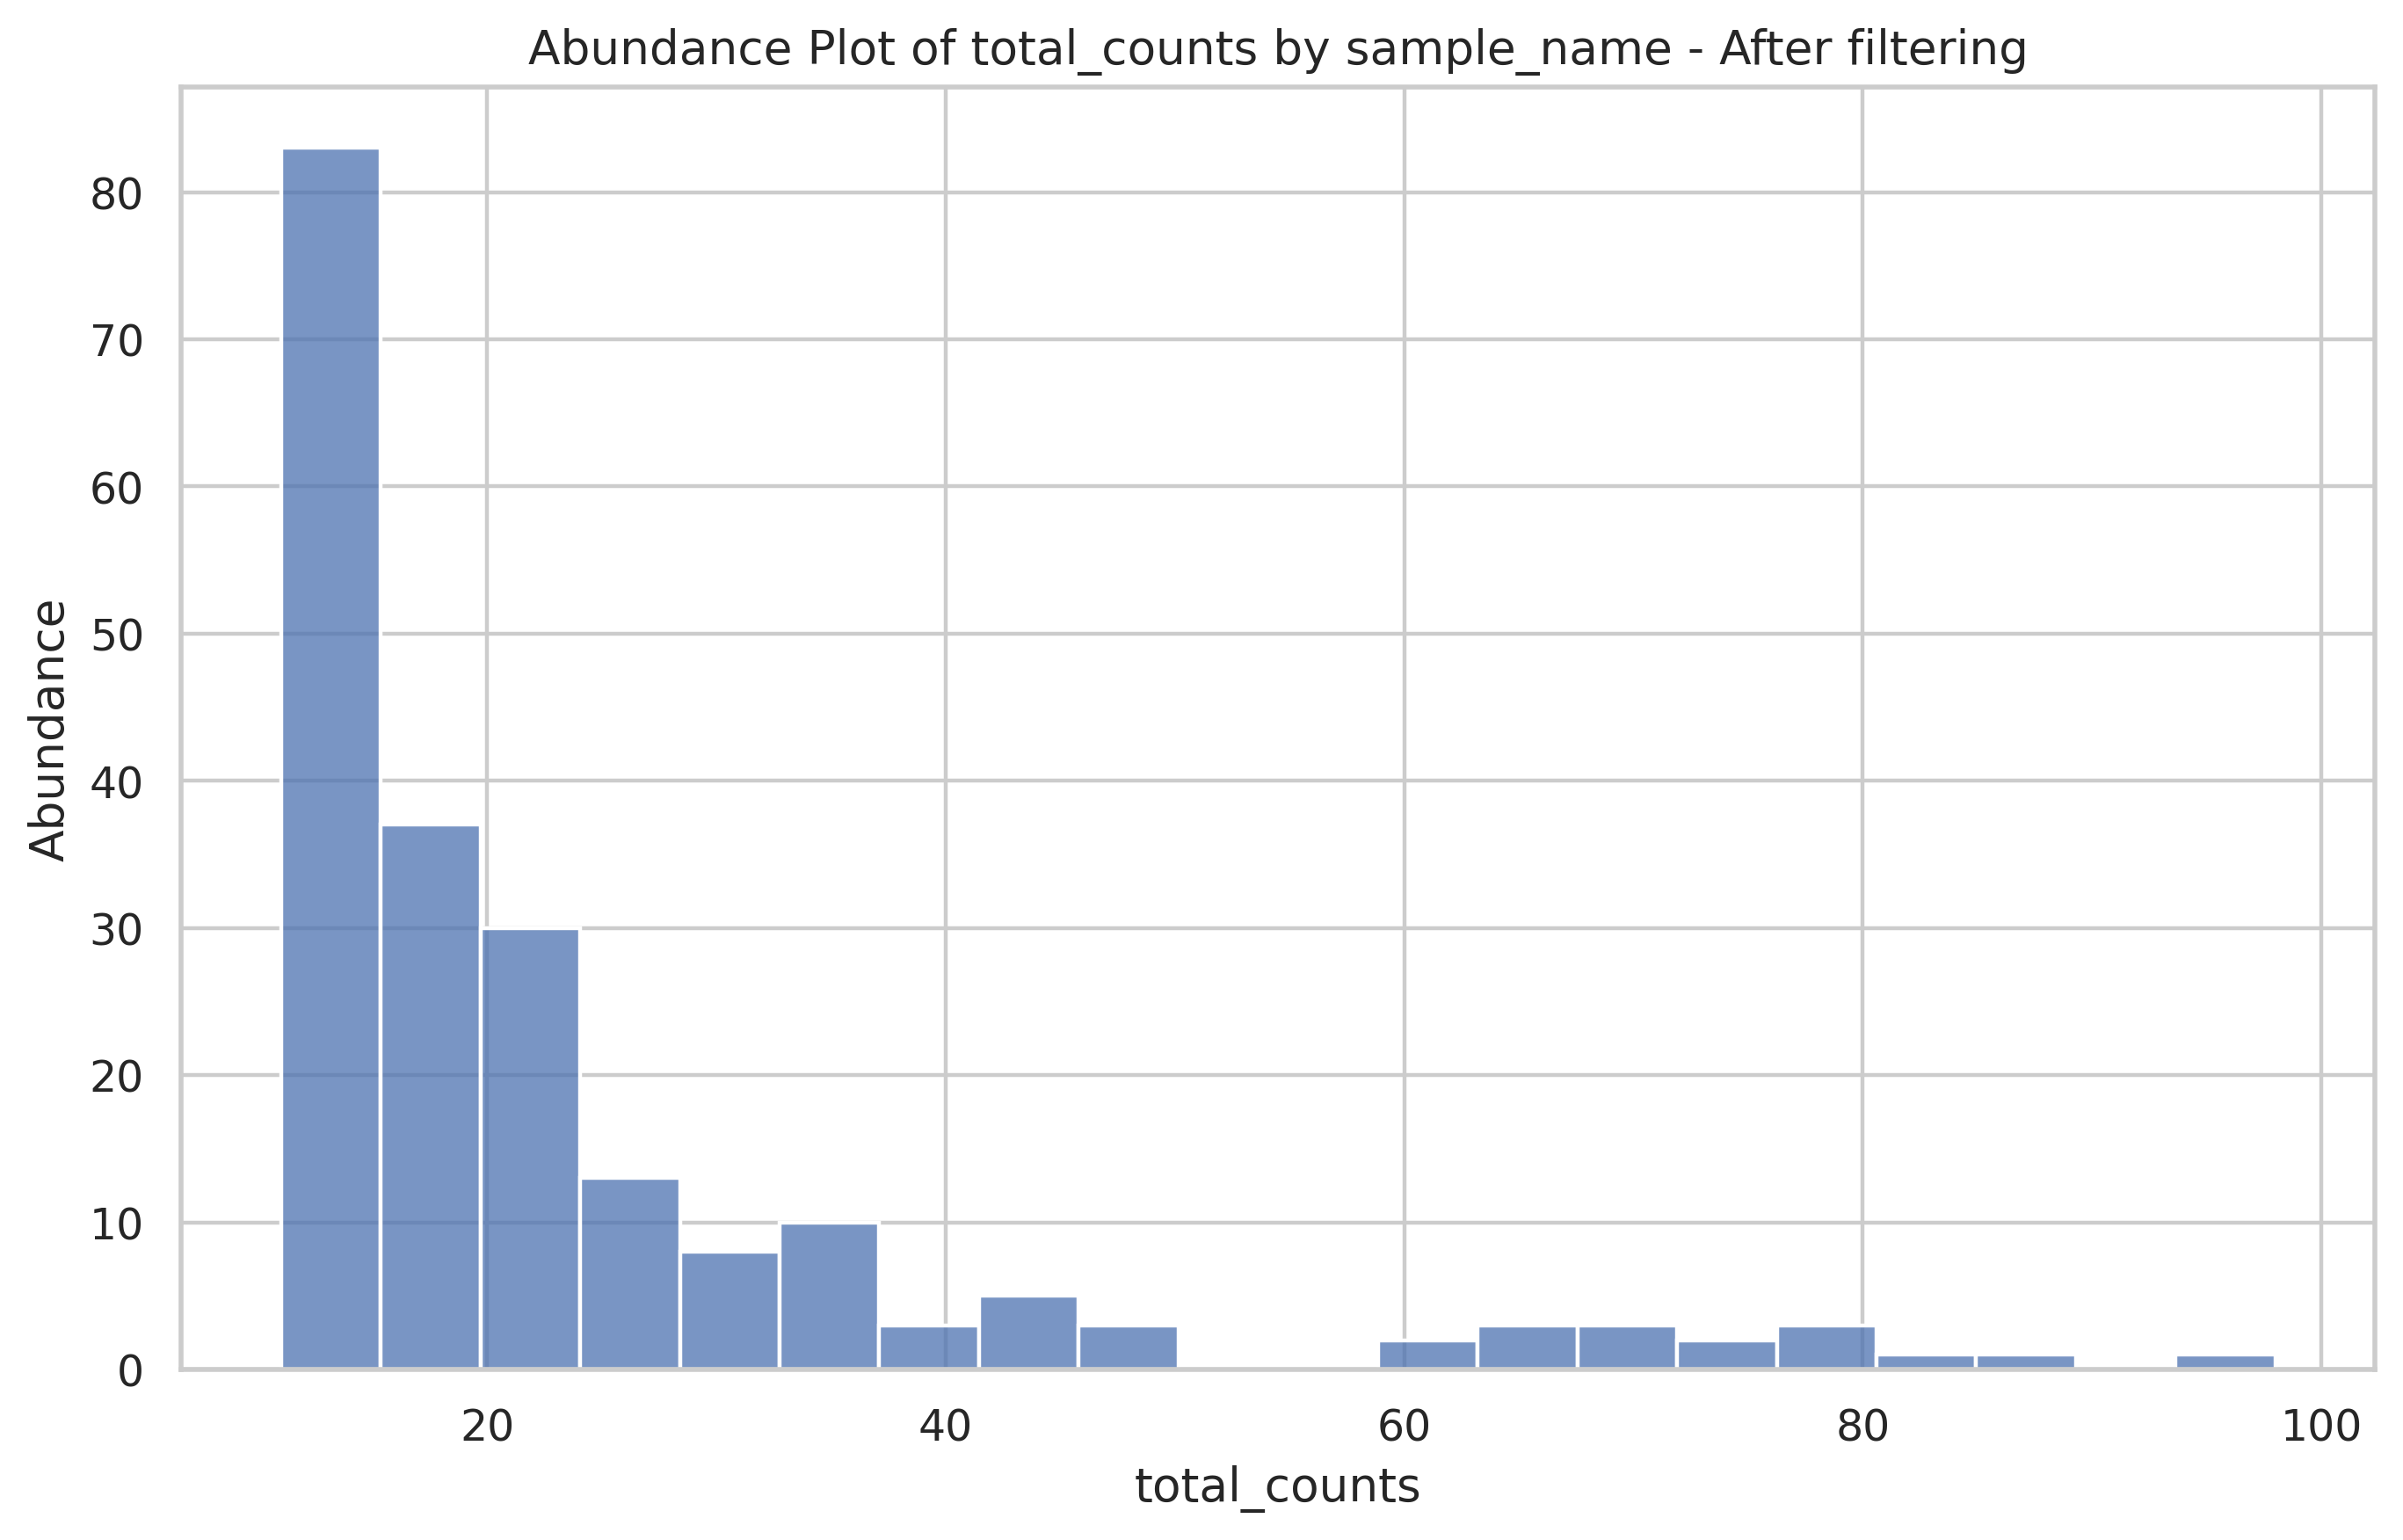

In [220]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'total_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

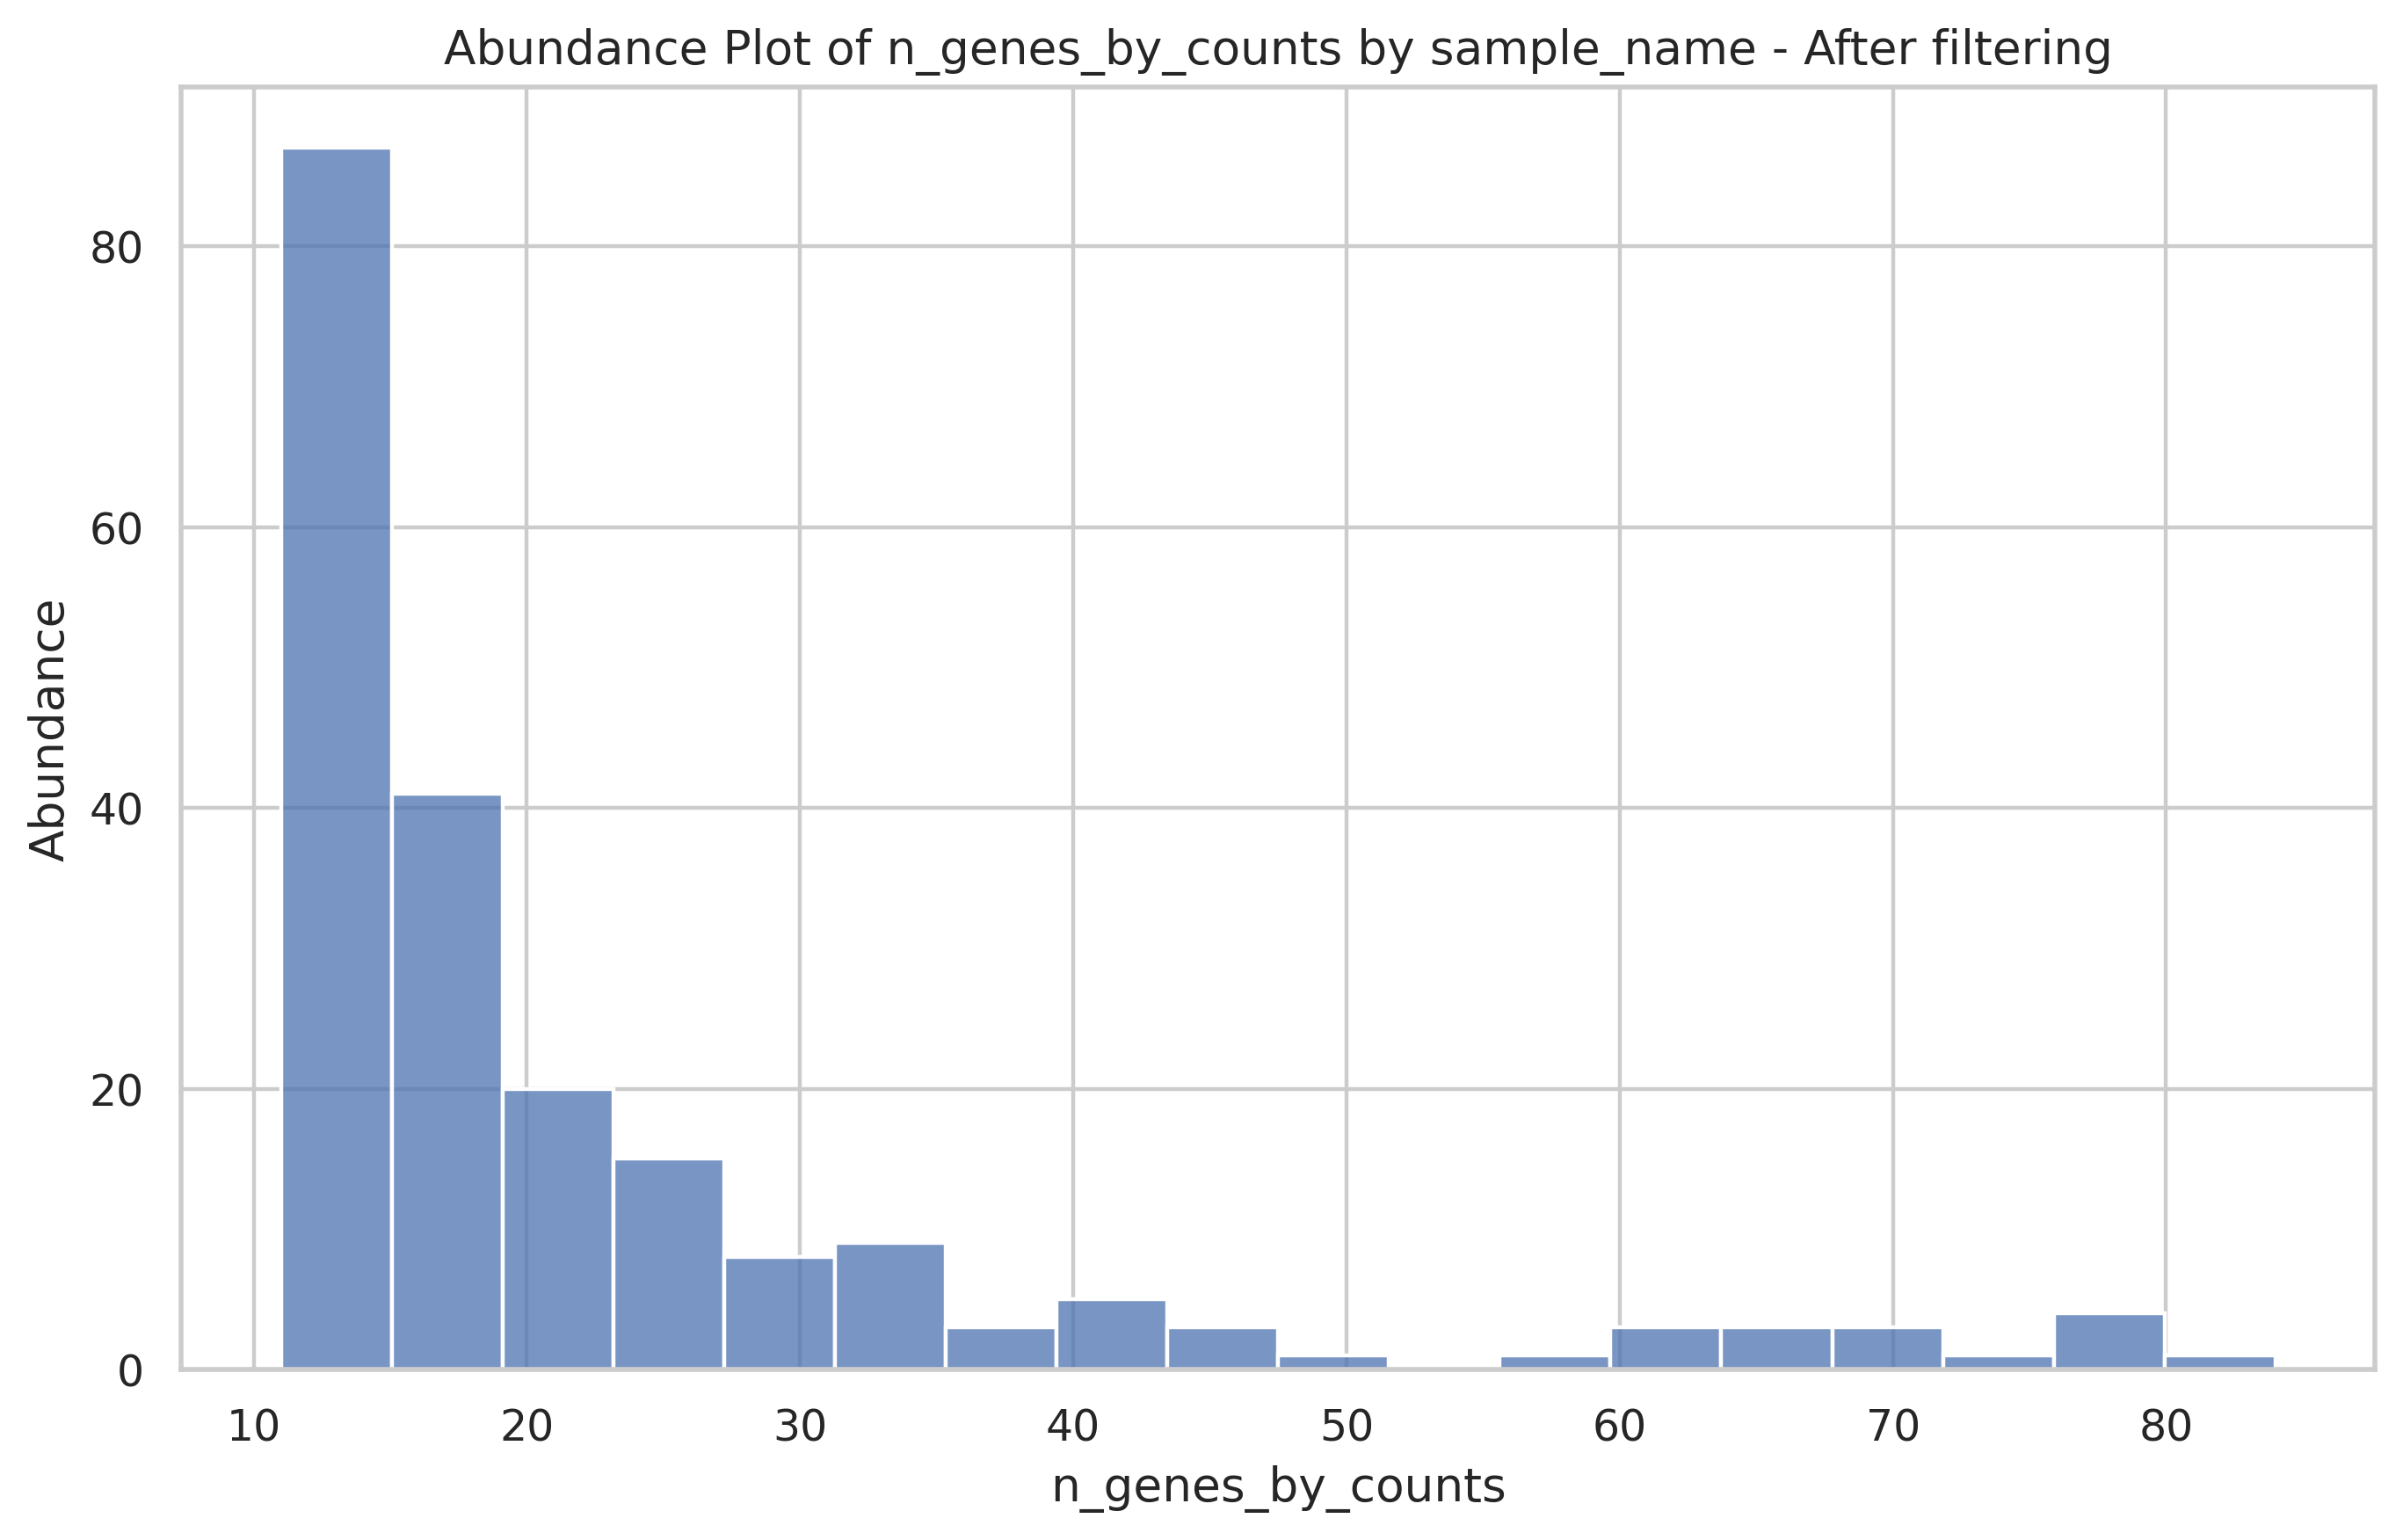

In [221]:
sb.set(style = "whitegrid")
covariate_to_visualize = 'n_genes_by_counts'

plt.figure(figsize = (10, 6))
sb.histplot(data = filtered_object.obs, x = covariate_to_visualize, stat = 'count', common_norm = False)
plt.xlabel(covariate_to_visualize)
plt.ylabel('Abundance')
plt.title(f'Abundance Plot of {covariate_to_visualize} by sample_name - After filtering')
plt.show()

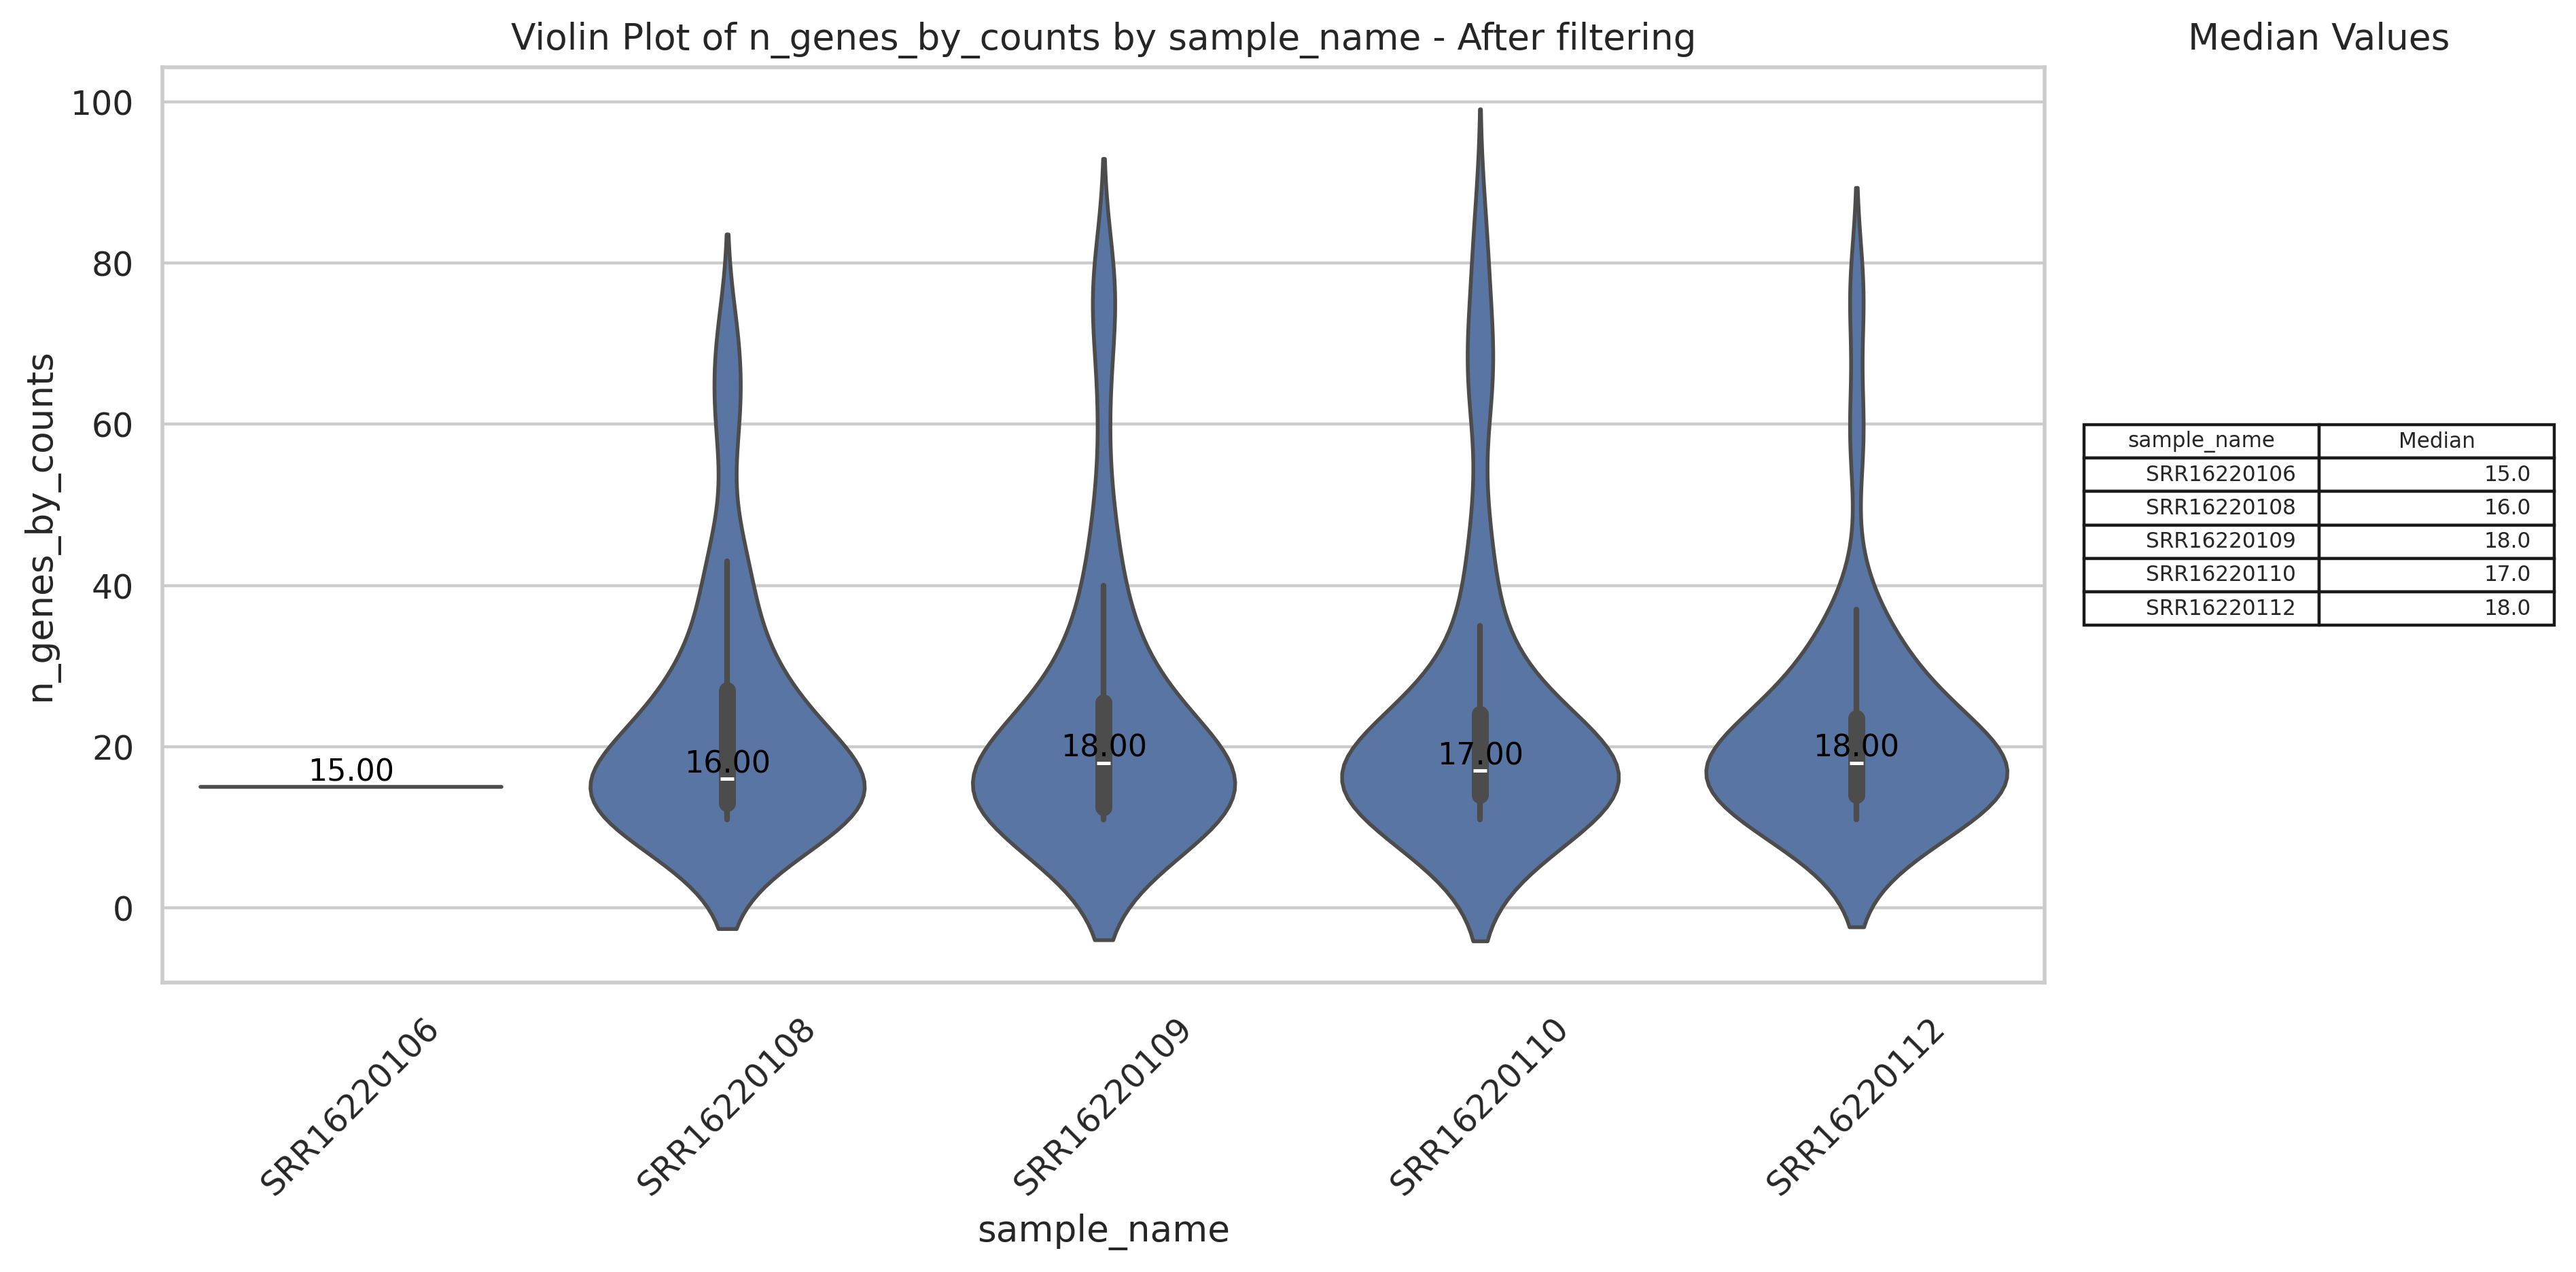

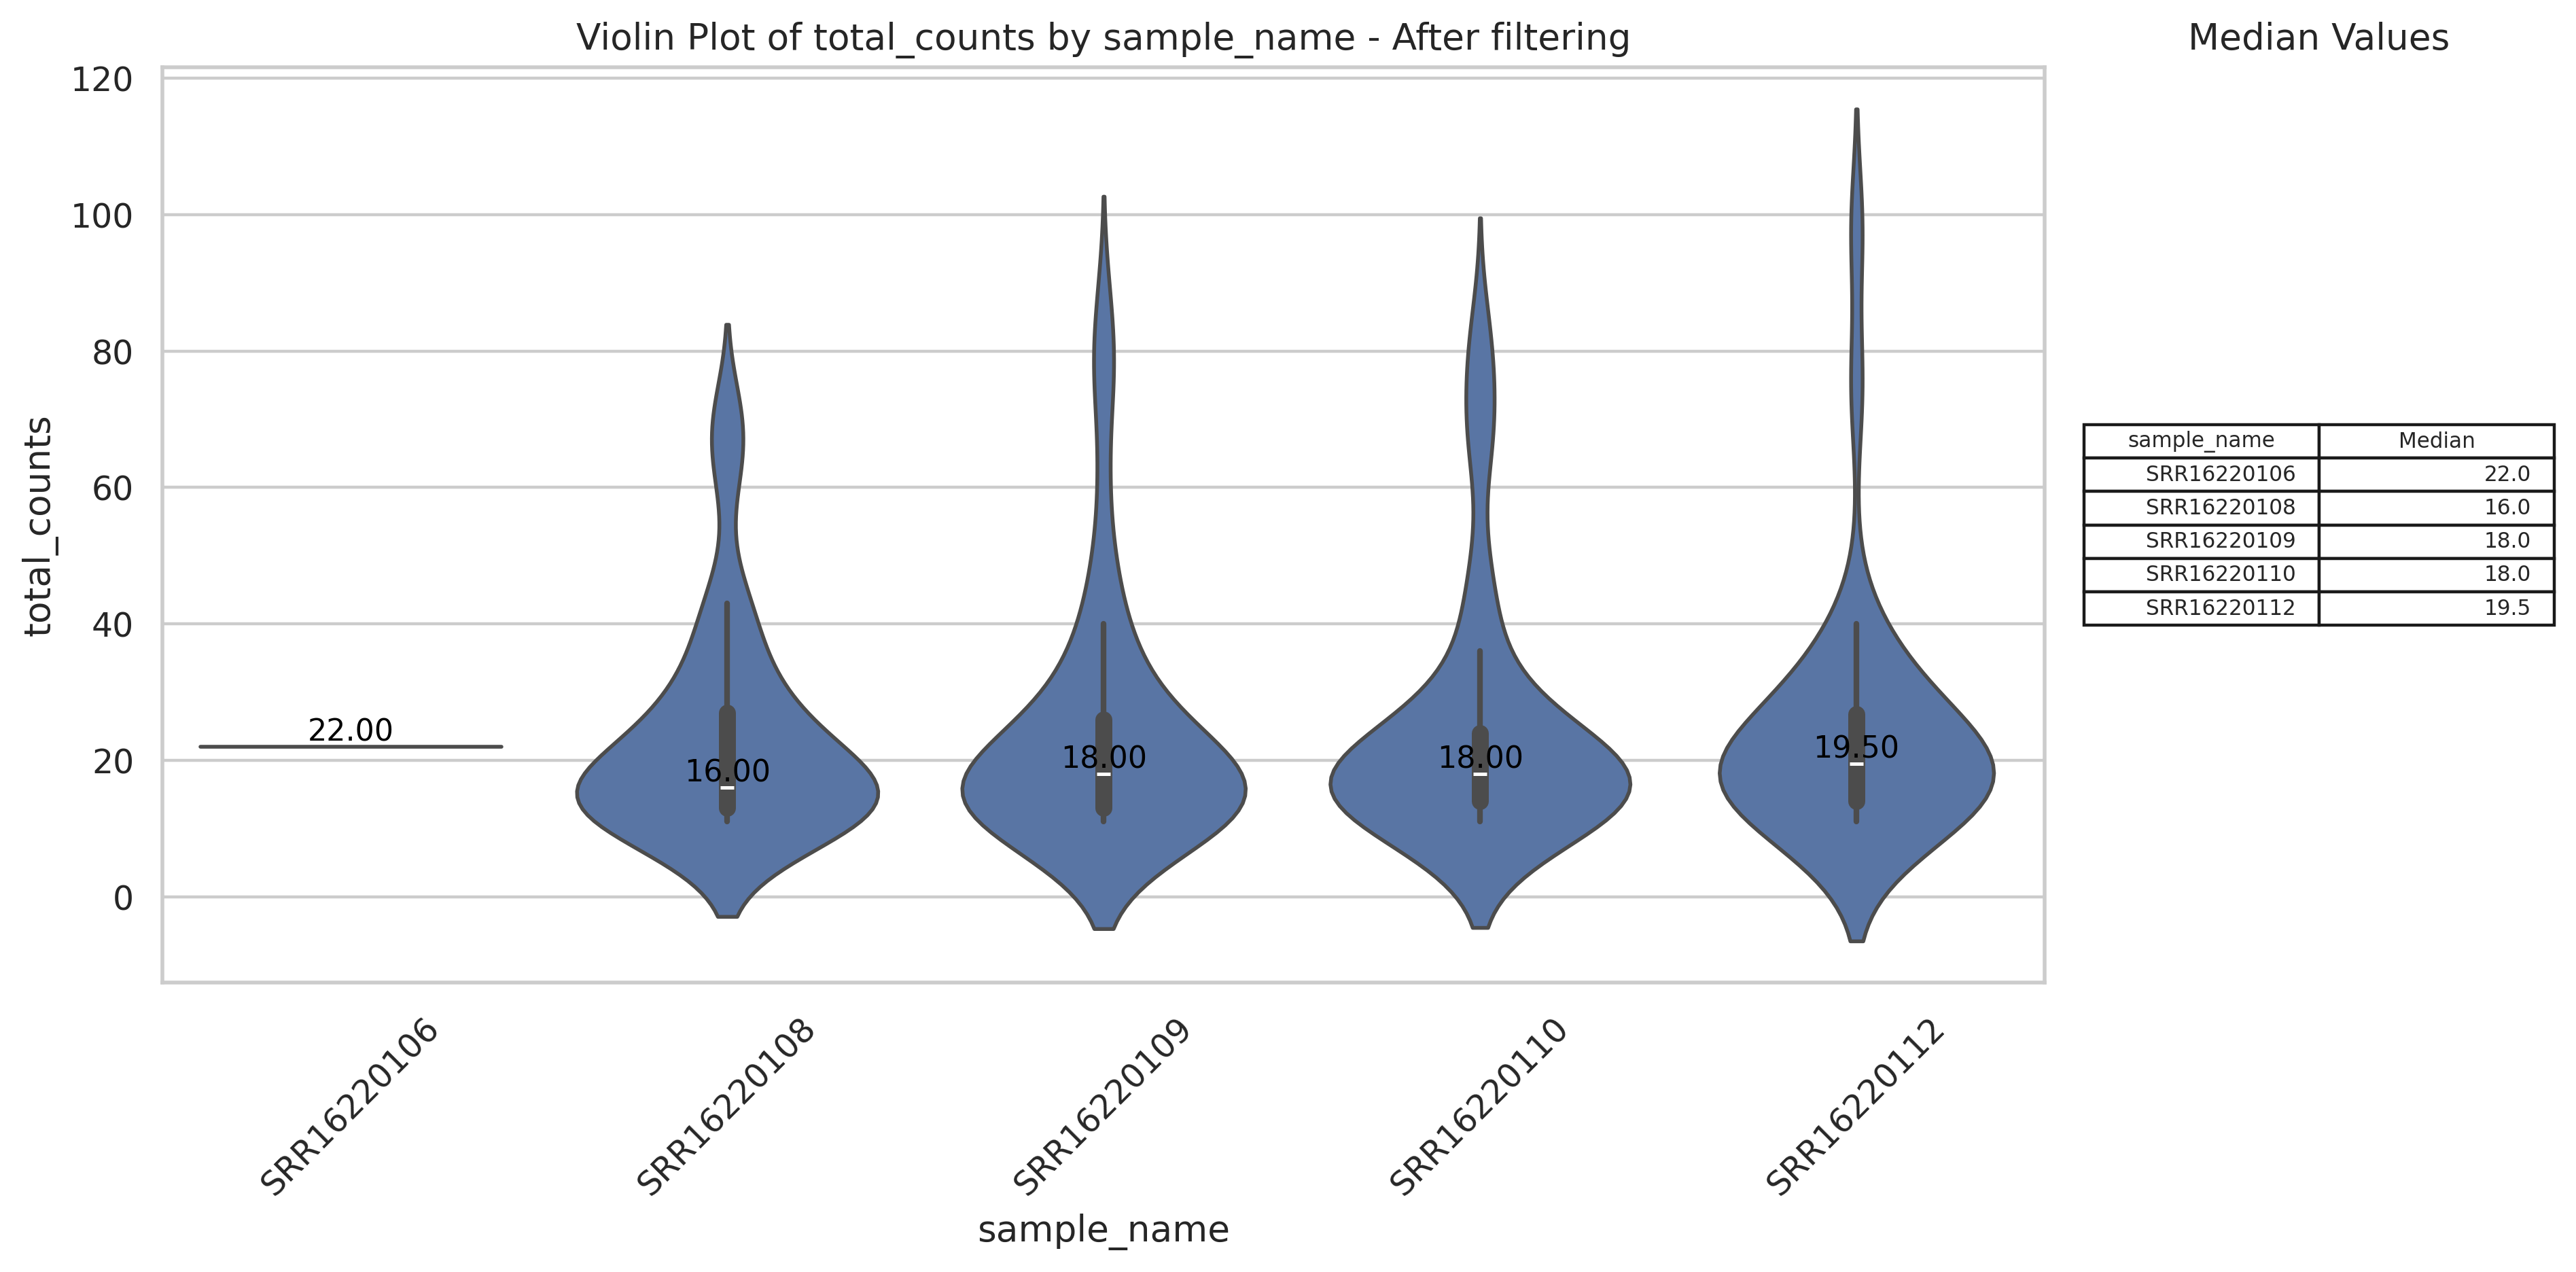

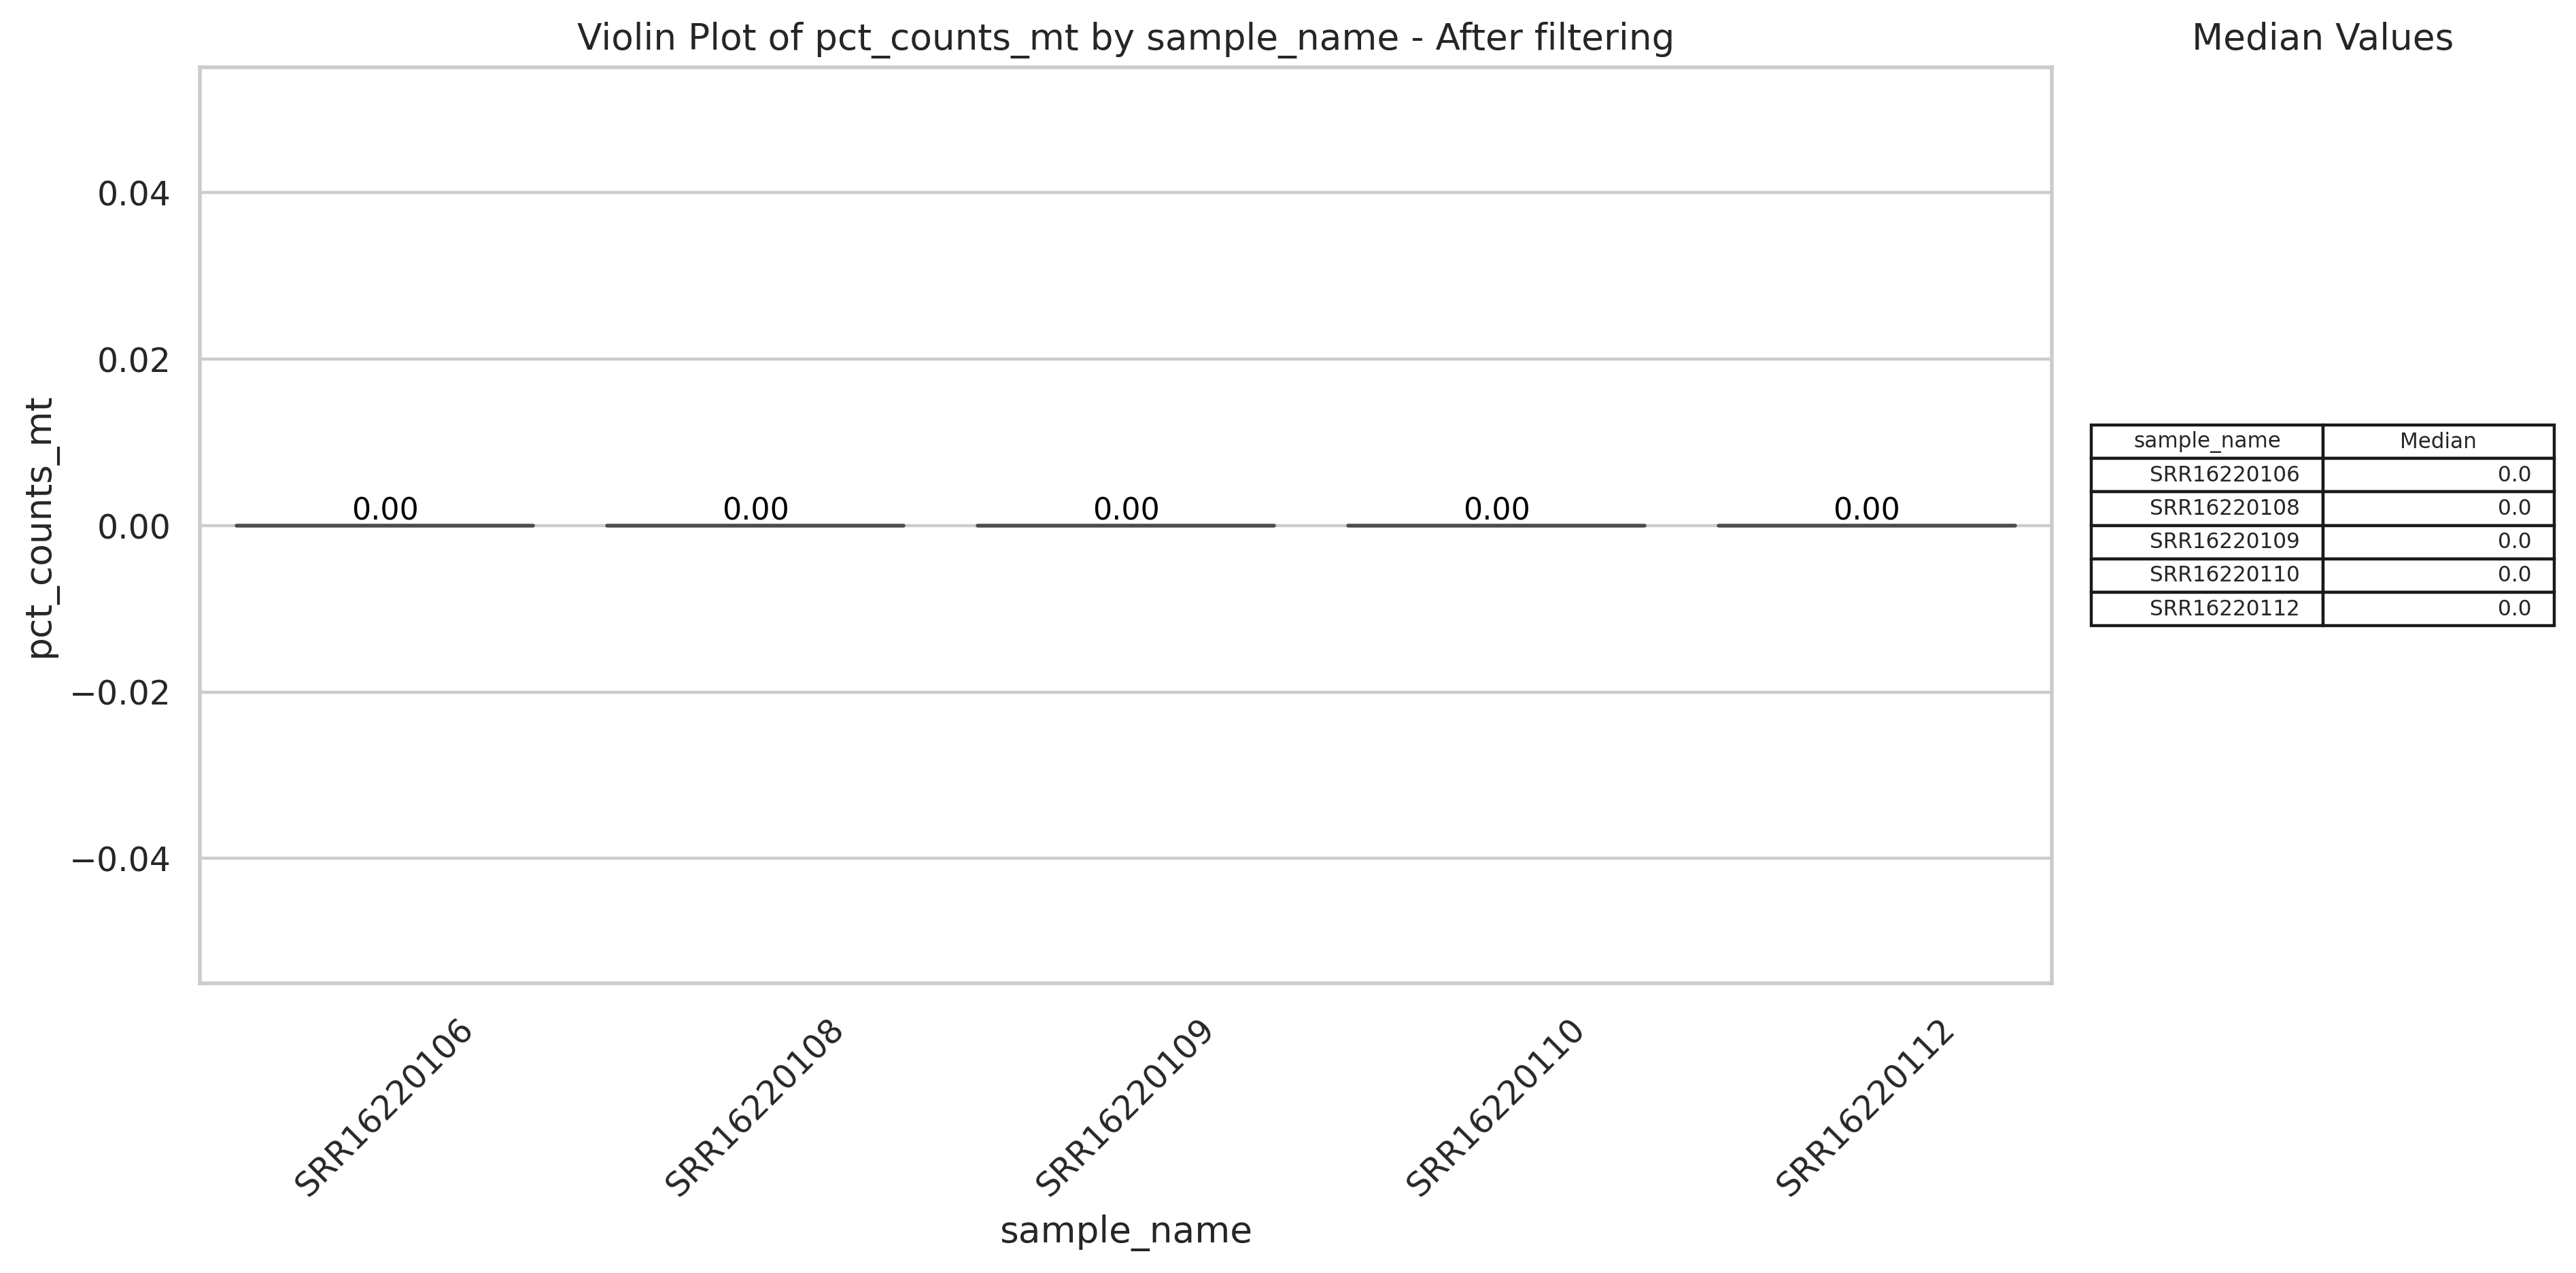

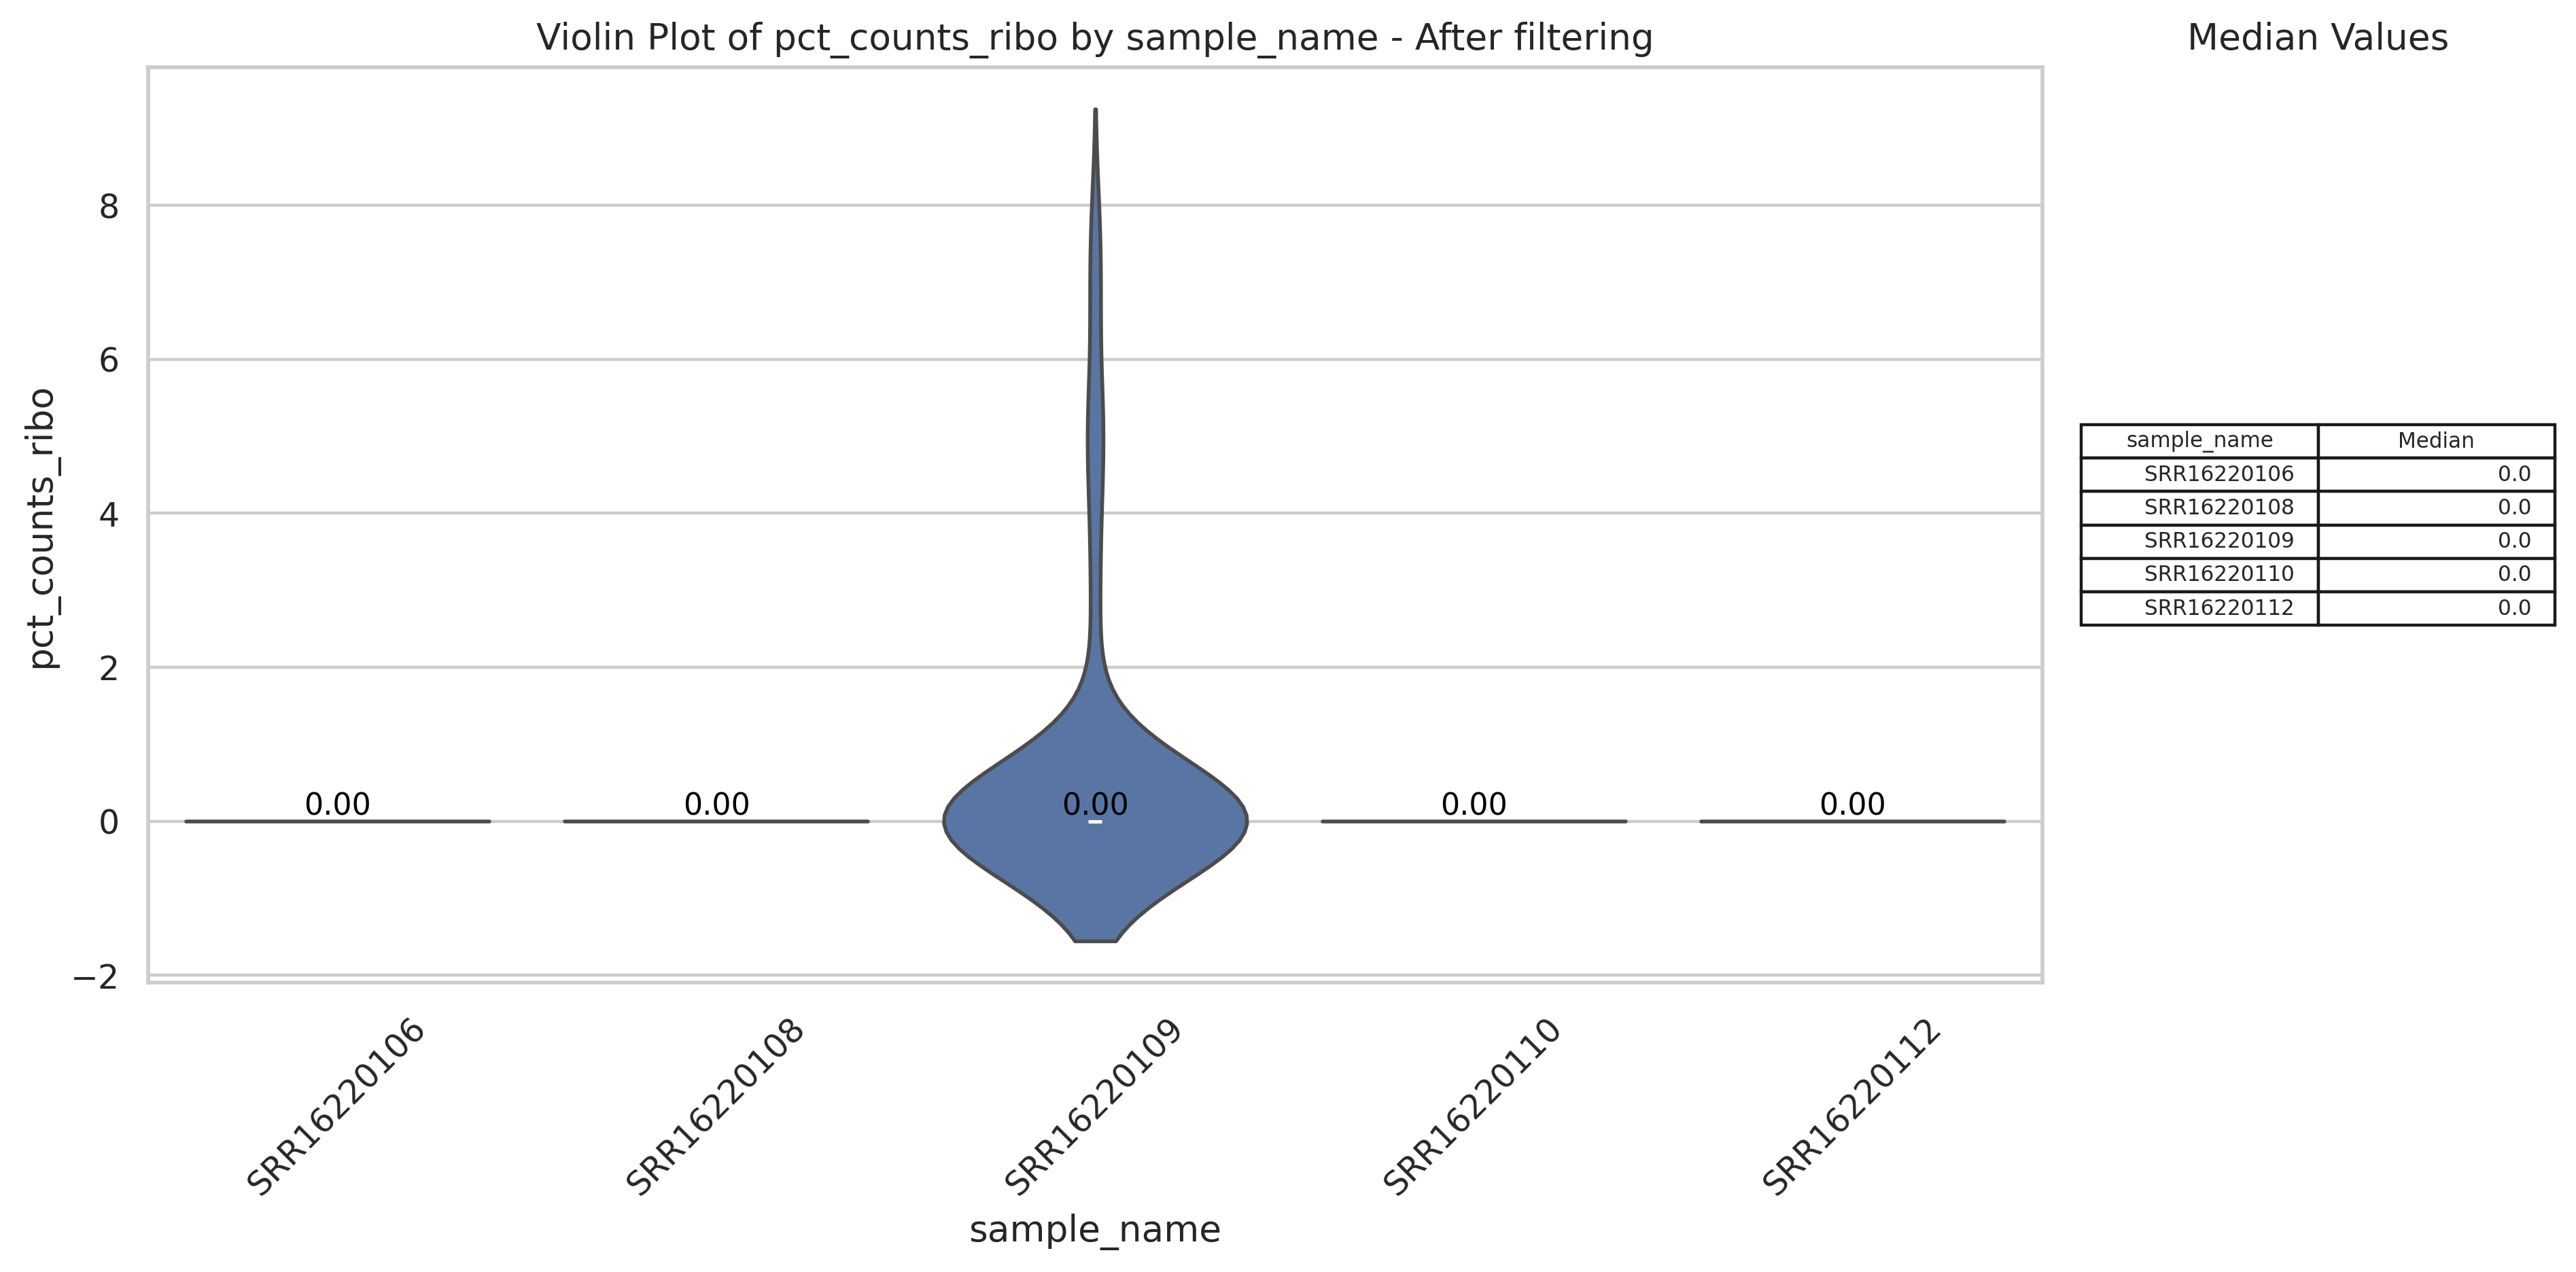

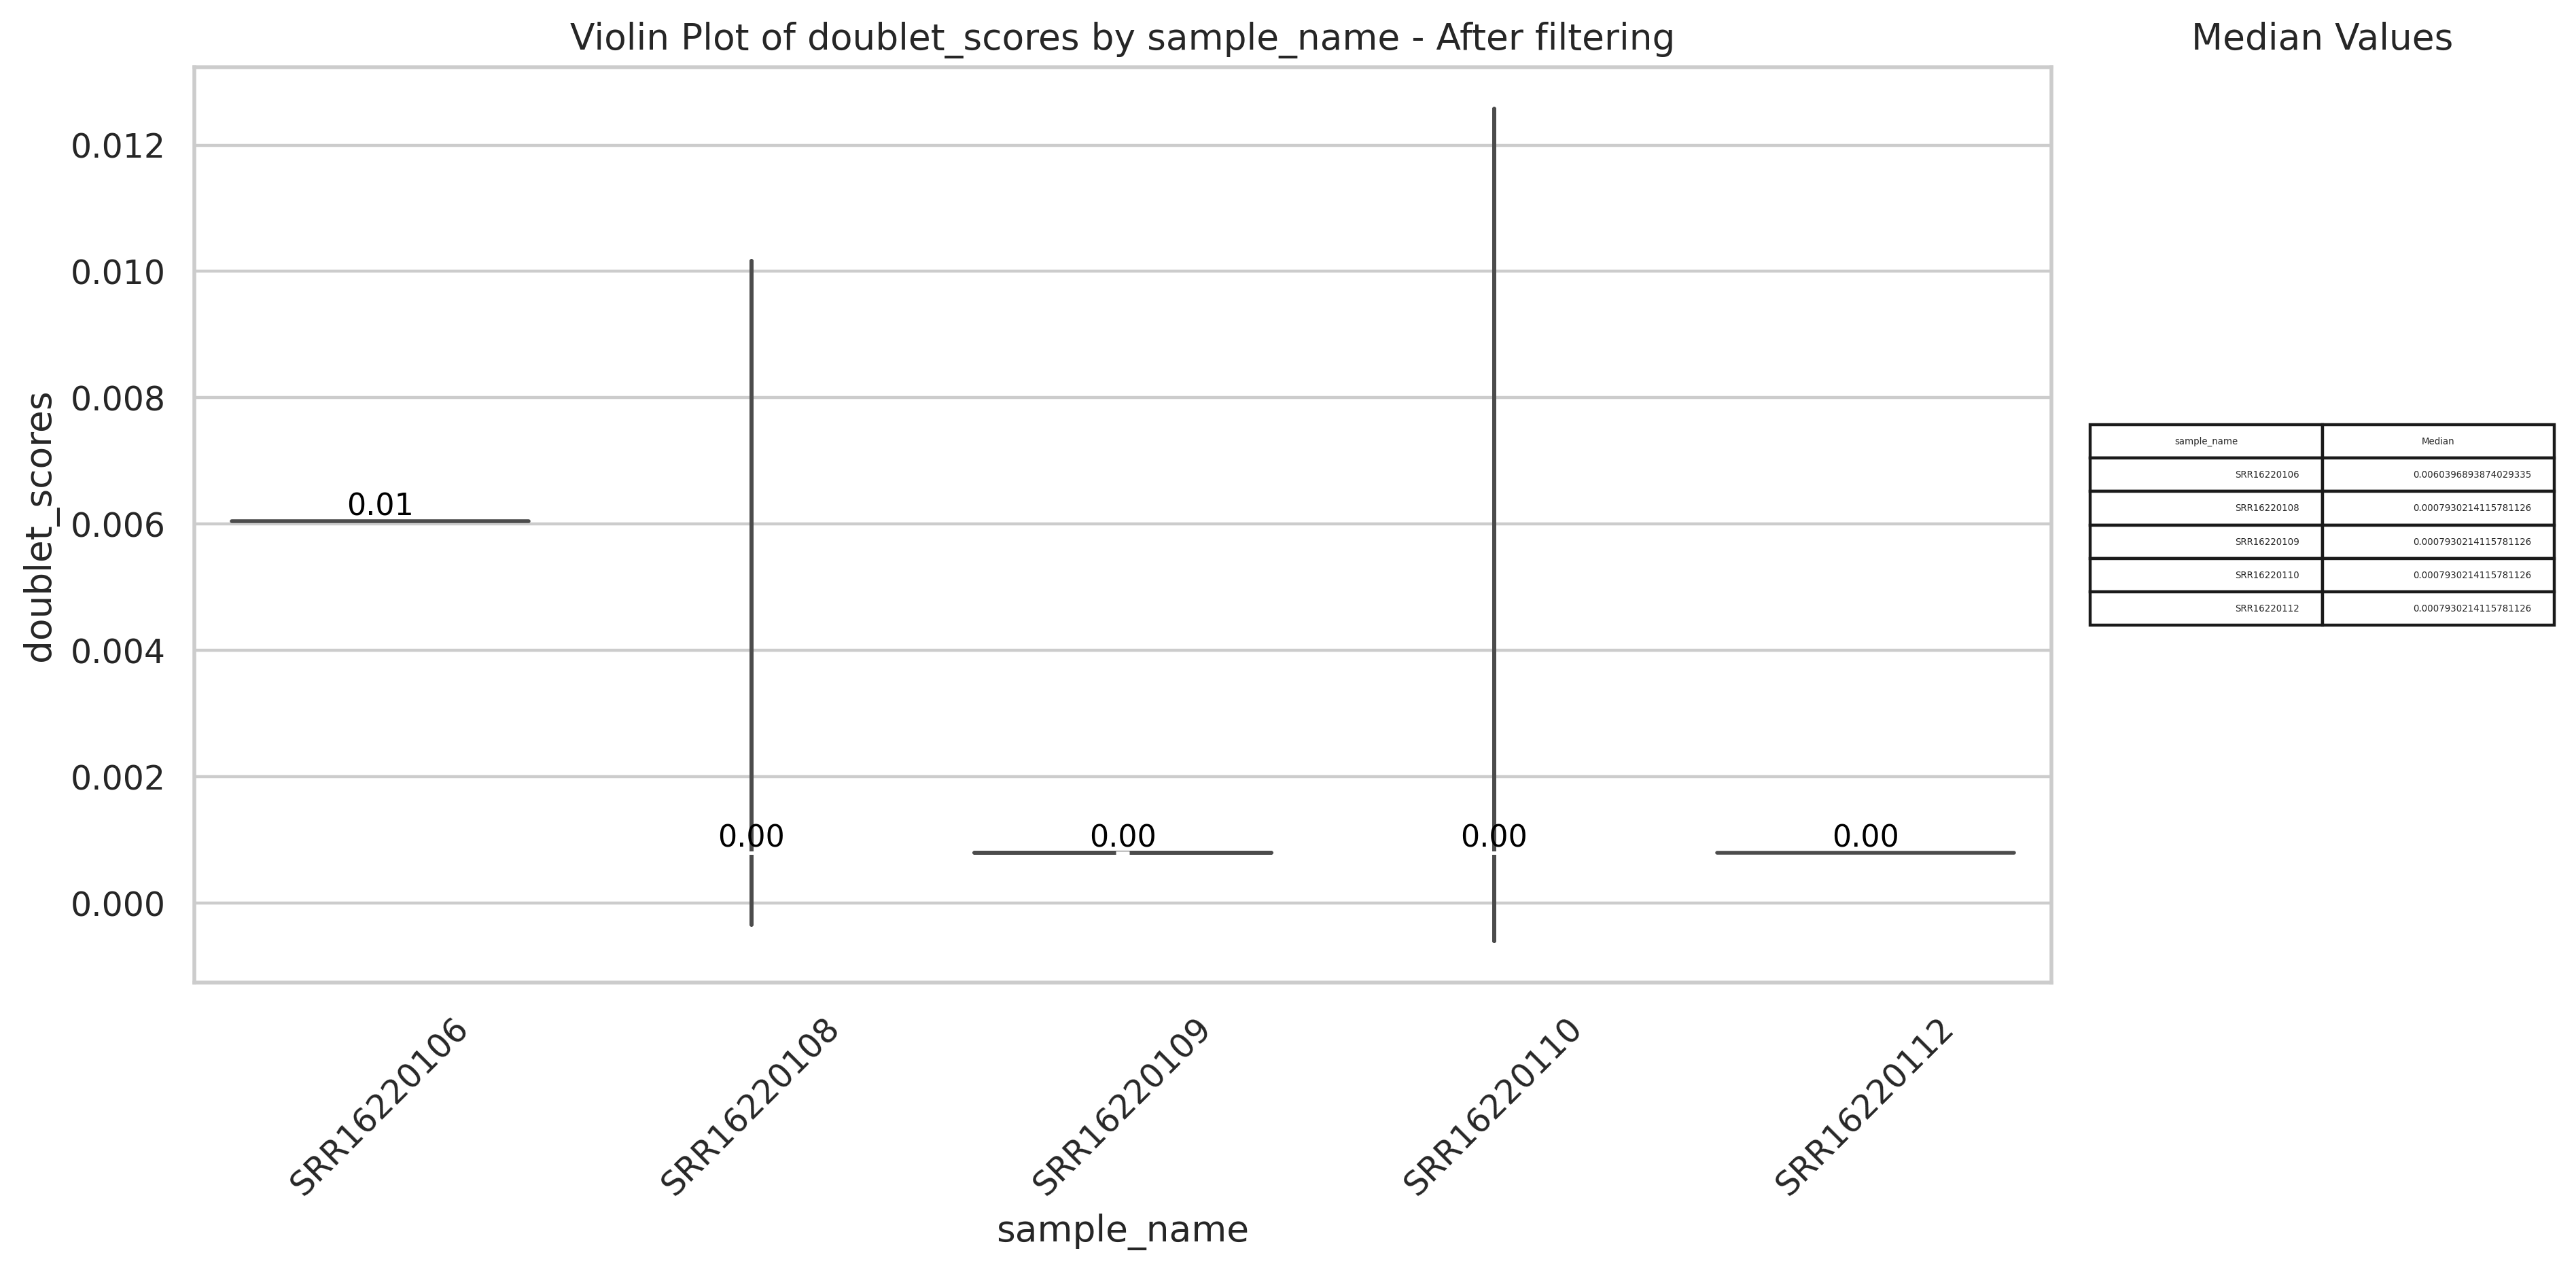

In [222]:
variables = 'n_genes_by_counts', 'total_counts', 'pct_counts_mt', 'pct_counts_ribo', 'doublet_scores'

for var in variables:

    fig, ax = plt.subplots(figsize=(12, 6), ncols=2, gridspec_kw={'width_ratios': [4, 1]})

    sb.violinplot(data=filtered_object.obs, x='sample_name', y=var, ax=ax[0])
   
    medians = filtered_object.obs.groupby('sample_name')[var].median()

    for sample_name, median in medians.items():
        ax[0].text(sample_name, median, f'{median:.2f}', ha='center', va='bottom', color='black', fontsize=10)
    
    ax[0].set_title(f'Violin Plot of {var} by sample_name - After filtering')
    ax[0].set_xlabel('sample_name')
    ax[0].set_ylabel(var)
    ax[0].tick_params(axis='x', rotation=45)

    median_df = pd.DataFrame({'sample_name': medians.index, 'Median': medians.values})

    ax[1].axis('off')
    ax[1].table(cellText=median_df.values, colLabels=median_df.columns, loc='center')
    ax[1].set_title('Median Values')
    
    plt.tight_layout()
    plt.show()

## Data Export

In [223]:
filtered_object.raw = filtered_object.copy()

filtered_object.layers['raw_counts'] = filtered_object.X.copy()

filtered_object.layers["sqrt_norm"] = np.sqrt(
    sc.pp.normalize_total(filtered_object, inplace = False)["X"]
)

filtered_object

normalizing counts per cell
    finished (0:00:00)


/home/skolla/miniforge3/envs/scanpy/lib/python3.12/site-packages/anndata/_core/anndata.py:1820: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


AnnData object with n_obs × n_vars = 208 × 804
    obs: 'sample_name', 'n_counts', 'doublet_scores', 'predicted_doublets', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'percent_chrY'
    var: 'genes', 'gene_name', 'mt', 'ribo', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'chromosome'
    layers: 'raw_counts', 'sqrt_norm'

In [224]:
filtered_object.obs['sample_name'].value_counts()

sample_name
SRR16220110    65
SRR16220109    55
SRR16220108    53
SRR16220112    34
SRR16220106     1
Name: count, dtype: int64

In [225]:
filtered_object.var.dtypes

genes                     object
gene_name                 object
mt                          bool
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts             float64
log1p_total_counts       float64
chromosome                object
dtype: object

In [226]:
filtered_object.var['mt'].value_counts()

mt
False    804
Name: count, dtype: int64

In [227]:
filtered_object.var['mt'] = filtered_object.var['mt'].astype(str)

In [228]:
print(filtered_object.var.dtypes)

genes                     object
gene_name                 object
mt                        object
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts             float64
log1p_total_counts       float64
chromosome                object
dtype: object


In [229]:
filtered_object.var

,genes,gene_name,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
DAB1,DAB1,,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
PPEF2,PPEF2,,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
CNTNAP2,CNTNAP2,,False,False,9,0.004760,0.004748,99.571633,10.0,2.397895,NaN
PTPRN2,PTPRN2,,False,False,8,0.004760,0.004748,99.619229,10.0,2.397895,NaN
LINGO2,LINGO2,,False,False,7,0.004760,0.004748,99.666825,10.0,2.397895,NaN
...,...,...,...,...,...,...,...,...,...,...,...
MRTFA,MRTFA,,False,False,10,0.005236,0.005222,99.524036,11.0,2.484907,NaN
DMD,DMD,,False,False,18,0.009995,0.009946,99.143265,21.0,3.091042,NaN
FTX,FTX,,False,False,15,0.008091,0.008059,99.286054,17.0,2.890372,NaN
UTY,UTY,,False,False,14,0.007139,0.007114,99.333651,15.0,2.772589,NaN


In [230]:
filtered_object.var = filtered_object.var.drop(columns=['gene_name'])
filtered_object.var

,genes,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
DAB1,DAB1,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
PPEF2,PPEF2,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
CNTNAP2,CNTNAP2,False,False,9,0.004760,0.004748,99.571633,10.0,2.397895,NaN
PTPRN2,PTPRN2,False,False,8,0.004760,0.004748,99.619229,10.0,2.397895,NaN
LINGO2,LINGO2,False,False,7,0.004760,0.004748,99.666825,10.0,2.397895,NaN
...,...,...,...,...,...,...,...,...,...,...
MRTFA,MRTFA,False,False,10,0.005236,0.005222,99.524036,11.0,2.484907,NaN
DMD,DMD,False,False,18,0.009995,0.009946,99.143265,21.0,3.091042,NaN
FTX,FTX,False,False,15,0.008091,0.008059,99.286054,17.0,2.890372,NaN
UTY,UTY,False,False,14,0.007139,0.007114,99.333651,15.0,2.772589,NaN


In [231]:
filtered_object.var = filtered_object.var.reset_index(drop=True)
filtered_object.var

,genes,mt,ribo,n_cells_by_counts,mean_counts,log1p_mean_counts,pct_dropout_by_counts,total_counts,log1p_total_counts,chromosome
0,DAB1,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
1,PPEF2,False,False,12,0.005712,0.005695,99.428843,12.0,2.564949,NaN
2,CNTNAP2,False,False,9,0.004760,0.004748,99.571633,10.0,2.397895,NaN
3,PTPRN2,False,False,8,0.004760,0.004748,99.619229,10.0,2.397895,NaN
4,LINGO2,False,False,7,0.004760,0.004748,99.666825,10.0,2.397895,NaN
...,...,...,...,...,...,...,...,...,...,...
799,MRTFA,False,False,10,0.005236,0.005222,99.524036,11.0,2.484907,NaN
800,DMD,False,False,18,0.009995,0.009946,99.143265,21.0,3.091042,NaN
801,FTX,False,False,15,0.008091,0.008059,99.286054,17.0,2.890372,NaN
802,UTY,False,False,14,0.007139,0.007114,99.333651,15.0,2.772589,NaN


In [232]:
# Convert categorical columns back to string where appropriate
filtered_object.var['genes'] = filtered_object.var['genes'].astype(str)
filtered_object.var['mt'] = filtered_object.var['mt'].astype(bool)  
filtered_object.var['ribo'] = filtered_object.var['ribo'].astype(bool)  
filtered_object.var['n_cells_by_counts'] = filtered_object.var['n_cells_by_counts'].astype(int)
filtered_object.var['mean_counts'] = filtered_object.var['mean_counts'].astype(float)
filtered_object.var['log1p_mean_counts'] = filtered_object.var['log1p_mean_counts'].astype(float)
filtered_object.var['pct_dropout_by_counts'] = filtered_object.var['pct_dropout_by_counts'].astype(float)
filtered_object.var['total_counts'] = filtered_object.var['total_counts'].astype(float)
filtered_object.var['log1p_total_counts'] = filtered_object.var['log1p_total_counts'].astype(float)
filtered_object.var['chromosome'] = filtered_object.var['chromosome'].astype(str)

# Reset index again if needed
filtered_object.var = filtered_object.var.reset_index(drop=True)
filtered_object.var.dtypes

genes                     object
mt                          bool
ribo                        bool
n_cells_by_counts          int64
mean_counts              float64
log1p_mean_counts        float64
pct_dropout_by_counts    float64
total_counts             float64
log1p_total_counts       float64
chromosome                object
dtype: object

In [233]:
filtered_object.write_h5ad(f'../ncbi_sra/data/PRJNA769125_sra_filtered_sk_{timestamp}.h5ad')